### Calculating Growth Rates
https://acp.copernicus.org/articles/24/2423/2024/

In [2]:
import xarray as xr
from nais.utils import remove_bad_data

nais1 = xr.open_dataset("/home/coliewo/Desktop/DATA/CNR/cnr_sep_oct.nc")
bad_data1 = xr.open_dataset("/home/coliewo/Desktop/DATA/CNR/cnr_sep_oct_bad_data_bounds.nc")
nais1 = remove_bad_data(nais1, bad_data1)

nais2 = xr.open_dataset("/home/coliewo/Desktop/DATA/CNR/cnr_may_aug.nc")
bad_data2 = xr.open_dataset("/home/coliewo/Desktop/DATA/CNR/cnr_may_aug_bad_data_bounds.nc")
nais2 = remove_bad_data(nais2, bad_data2)

# Concatenate along a specific dimension, such as 'time'
complete_nais = xr.concat([nais2, nais1], dim="time")
complete_nais


/home/coliewo/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/coliewo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/coliewo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<xarray.Dataset>
Dimensions:             (diameter: 55, flag: 102, time: 3986)
Coordinates:
  * diameter            (diameter) float64 8.029e-10 8.628e-10 ... 4.155e-08
  * flag                (flag) <U61 '+ postfilter voltage may be too high' .....
  * time                (time) datetime64[ns] 2024-05-17 ... 2024-10-30
Data variables:
    neg_ions            (time, diameter) float64 nan nan nan ... 1.969e+03 nan
    pos_ions            (time, diameter) float64 nan nan nan ... 1.815e+03 nan
    neg_particles       (time, diameter) float64 nan nan ... 8.7e+03 8.971e+03
    pos_particles       (time, diameter) float64 nan nan ... 1.439e+04 1.408e+04
    neg_ion_flags       (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    pos_ion_flags       (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    neg_particle_flags  (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    pos_particle_flags  (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
Attributes: (12/14)
    measurement_location:            CNR Bologna
    description:                     Rooftop Measurements
    longitude:                       11.34
    latitude:                        44.52
    inlet_length:                    0.85
    do_inlet_loss_correction:        True
    ...                              ...
    remove_corona_ions:              True
    fill_temperature:                273.15
    fill_pressure:                   101325.0
    fill_flowrate:                   54.0
    dilution_on:                     False
    resolution:                      5min

In [3]:
complete_nais.drop_duplicates(dim='time')   #dont look like we had any duplicates to begin with
complete_nais

<xarray.Dataset>
Dimensions:             (diameter: 55, flag: 102, time: 3986)
Coordinates:
  * diameter            (diameter) float64 8.029e-10 8.628e-10 ... 4.155e-08
  * flag                (flag) <U61 '+ postfilter voltage may be too high' .....
  * time                (time) datetime64[ns] 2024-05-17 ... 2024-10-30
Data variables:
    neg_ions            (time, diameter) float64 nan nan nan ... 1.969e+03 nan
    pos_ions            (time, diameter) float64 nan nan nan ... 1.815e+03 nan
    neg_particles       (time, diameter) float64 nan nan ... 8.7e+03 8.971e+03
    pos_particles       (time, diameter) float64 nan nan ... 1.439e+04 1.408e+04
    neg_ion_flags       (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    pos_ion_flags       (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    neg_particle_flags  (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    pos_particle_flags  (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
Attributes: (12/14)
    measurement_location:            CNR Bologna
    description:                     Rooftop Measurements
    longitude:                       11.34
    latitude:                        44.52
    inlet_length:                    0.85
    do_inlet_loss_correction:        True
    ...                              ...
    remove_corona_ions:              True
    fill_temperature:                273.15
    fill_pressure:                   101325.0
    fill_flowrate:                   54.0
    dilution_on:                     False
    resolution:                      5min

In [4]:

# Calculate particles (positive + negative particles)
particles = complete_nais['pos_particles'] + complete_nais['neg_particles']

In [42]:
# Rows are times, columns are diameters
diameters = particles['diameter']  # Diameters 
times = particles['time']  # Times in seconds

# Example concentration matrix (rows = time, columns = diameters)
concentrations = particles.values

# Convert times to a Pandas DataFrame for easier handling
df = pd.DataFrame(concentrations, index=times, columns=diameters)
df

8.028800e-10  8.628290e-10  9.272542e-10  9.961534e-10  \
2024-05-17 00:00:00           NaN           NaN           NaN           NaN   
2024-05-17 01:00:00           NaN           NaN           NaN           NaN   
2024-05-17 02:00:00           NaN           NaN           NaN           NaN   
2024-05-17 03:00:00           NaN           NaN           NaN           NaN   
2024-05-17 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2024-10-29 20:00:00           NaN           NaN           NaN           NaN   
2024-10-29 21:00:00           NaN           NaN           NaN           NaN   
2024-10-29 22:00:00           NaN           NaN           NaN           NaN   
2024-10-29 23:00:00           NaN           NaN           NaN           NaN   
2024-10-30 00:00:00           NaN           NaN           NaN           NaN   

                     1.070172e-09  1.151195e-09  1.238353e-09  1.330049e-09  \
2024-05-17 00:00:00           NaN           NaN           NaN           NaN   
2024-05-17 01:00:00           NaN           NaN           NaN           NaN   
2024-05-17 02:00:00           NaN           NaN           NaN           NaN   
2024-05-17 03:00:00           NaN           NaN           NaN           NaN   
2024-05-17 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2024-10-29 20:00:00           NaN           NaN           NaN           NaN   
2024-10-29 21:00:00           NaN           NaN           NaN           NaN   
2024-10-29 22:00:00           NaN           NaN           NaN           NaN   
2024-10-29 23:00:00           NaN           NaN           NaN           NaN   
2024-10-30 00:00:00           NaN           NaN           NaN           NaN   

                     1.428535e-09  1.535309e-09  ...  2.107146e-08  \
2024-05-17 00:00:00           NaN           NaN  ...           NaN   
2024-05-17 01:00:00           NaN           NaN  ...           NaN   
2024-05-17 02:00:00           NaN           NaN  ...           NaN   
2024-05-17 03:00:00           NaN           NaN  ...           NaN   
2024-05-17 04:00:00           NaN           NaN  ...           NaN   
...                           ...           ...  ...           ...   
2024-10-29 20:00:00           NaN           NaN  ...  31693.052058   
2024-10-29 21:00:00           NaN           NaN  ...  26171.853778   
2024-10-29 22:00:00           NaN           NaN  ...  20514.986785   
2024-10-29 23:00:00           NaN           NaN  ...  18815.824162   
2024-10-30 00:00:00           NaN           NaN  ...  16604.038356   

                     2.268812e-08  2.445574e-08  2.636108e-08  2.841614e-08  \
2024-05-17 00:00:00           NaN           NaN           NaN           NaN   
2024-05-17 01:00:00           NaN           NaN           NaN           NaN   
2024-05-17 02:00:00           NaN           NaN           NaN           NaN   
2024-05-17 03:00:00           NaN           NaN           NaN           NaN   
2024-05-17 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2024-10-29 20:00:00  31210.145731  30118.213344  29228.484949  29963.886100   
2024-10-29 21:00:00  25631.138525  24445.673303  24137.489631  24295.047599   
2024-10-29 22:00:00  20287.040318  19833.925555  20620.623135  21861.682713   
2024-10-29 23:00:00  19593.176730  20190.739758  21299.075653  22462.213277   
2024-10-30 00:00:00  16864.311212  16657.273651  16577.570353  16817.909559   

                     3.063141e-08  3.302483e-08  3.560527e-08  3.846420e-08  \
2024-05-17 00:00:00           NaN           NaN           NaN           NaN   
2024-05-17 01:00:00           NaN           NaN           NaN           NaN   
2024-05-17 02:00:00           NaN           NaN           NaN           NaN   
2024-05-17 03:00:

In [48]:
df

8.02879995e-10  8.62828998e-10  9.27254239e-10  \
2024-05-17 00:00:00             NaN             NaN             NaN   
2024-05-17 01:00:00             NaN             NaN             NaN   
2024-05-17 02:00:00             NaN             NaN             NaN   
2024-05-17 03:00:00             NaN             NaN             NaN   
2024-05-17 04:00:00             NaN             NaN             NaN   
...                             ...             ...             ...   
2024-10-29 20:00:00             NaN             NaN             NaN   
2024-10-29 21:00:00             NaN             NaN             NaN   
2024-10-29 22:00:00             NaN             NaN             NaN   
2024-10-29 23:00:00             NaN             NaN             NaN   
2024-10-30 00:00:00             NaN             NaN             NaN   

                     9.96153364e-10  1.070172e-09  1.15119523e-09  \
2024-05-17 00:00:00             NaN           NaN             NaN   
2024-05-17 01:00:00             NaN           NaN             NaN   
2024-05-17 02:00:00             NaN           NaN             NaN   
2024-05-17 03:00:00             NaN           NaN             NaN   
2024-05-17 04:00:00             NaN           NaN             NaN   
...                             ...           ...             ...   
2024-10-29 20:00:00             NaN           NaN             NaN   
2024-10-29 21:00:00             NaN           NaN             NaN   
2024-10-29 22:00:00             NaN           NaN             NaN   
2024-10-29 23:00:00             NaN           NaN             NaN   
2024-10-30 00:00:00             NaN           NaN             NaN   

                     1.23835276e-09  1.3300488e-09  1.42853463e-09  \
2024-05-17 00:00:00             NaN            NaN             NaN   
2024-05-17 01:00:00             NaN            NaN             NaN   
2024-05-17 02:00:00             NaN            NaN             NaN   
2024-05-17 03:00:00             NaN            NaN             NaN   
2024-05-17 04:00:00             NaN            NaN             NaN   
...                             ...            ...             ...   
2024-10-29 20:00:00             NaN            NaN             NaN   
2024-10-29 21:00:00             NaN            NaN             NaN   
2024-10-29 22:00:00             NaN            NaN             NaN   
2024-10-29 23:00:00             NaN            NaN             NaN   
2024-10-30 00:00:00             NaN            NaN             NaN   

                     1.53530865e-09  ...  2.10714554e-08  2.2688121e-08  \
2024-05-17 00:00:00             NaN  ...             NaN            NaN   
2024-05-17 01:00:00             NaN  ...             NaN            NaN   
2024-05-17 02:00:00             NaN  ...             NaN            NaN   
2024-05-17 03:00:00             NaN  ...             NaN            NaN   
2024-05-17 04:00:00             NaN  ...             NaN            NaN   
...                             ...  ...             ...            ...   
2024-10-29 20:00:00             NaN  ...    31693.052058   31210.145731   
2024-10-29 21:00:00             NaN  ...    26171.853778   25631.138525   
2024-10-29 22:00:00             NaN  ...    20514.986785   20287.040318   
2024-10-29 23:00:00             NaN  ...    18815.824162   19593.176730   
2024-10-30 00:00:00             NaN  ...    16604.038356   16864.311212   

                     2.44557438e-08  2.63610813e-08  2.84161425e-08  \
2024-05-17 00:00:00             NaN             NaN             NaN   
2024-05-17 01:00:00             NaN             NaN             NaN   
2024-05-17 02:00:00             NaN             NaN             NaN   
2024-05-17 03:00:00             NaN             NaN             NaN   
2024-05-17 04:00:00             NaN             NaN             NaN   
...                             ...             ...             ...   
2024-10-29 20:00:00    30118.213344    29228.484949    29963.886100   
2024-10-29 21:00:00    24445.

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt


def calculate_global_50percent_and_growth_rate(df, diameter_range):
    """
    Calculate the time and diameter corresponding to 50% of the global maximum concentration
    within the specified diameter range, and compute the average growth rate.
    
    Step 1: Filter diameters within the specified range.
    Step 2: Identify the global 50% maximum concentration within the filtered range.
    Step 3: Determine the time and diameter associated with this value.
    Step 4: Compute the average growth rate as the slope between (t_initial, d_initial) and (t_0.5max, d_0.5max).
    """
    # Convert column names to floats (if they are strings)
    df.columns = df.columns.astype(float)

    # Step 1: Filter the columns (diameters) within the specified range
    filtered_diameters = [col for col in df.columns if diameter_range[0] <= col <= diameter_range[1]]
    if not filtered_diameters:
        raise ValueError("No diameters found in the specified range.")

    # Filter the DataFrame to only include the selected diameters
    df_filtered = df[filtered_diameters]

    # Step 2: Identify the global maximum concentration within the range
    max_concentration = df_filtered.max().max()
    half_concentration = 0.5 * max_concentration

    # Step 3: Determine the time and diameter for 50% of the max concentration
    global_time = None
    global_diameter = None
    for col in df_filtered.columns:
        if df_filtered[col].max() >= half_concentration:
            # Get the first time where the concentration reaches or exceeds 50% of max
            time_at_half = df_filtered[df_filtered[col] >= half_concentration].index[0]
            global_time = time_at_half
            global_diameter = col
            break

    # Initial conditions
    t_initial = df.index[0]
    d_initial = min(filtered_diameters)

    # Step 4: Compute the average growth rate
    delta_t = (global_time - t_initial).total_seconds() / 3600  # Time difference in hours
    delta_d = (global_diameter - d_initial) * 1e9  # Diameter difference in nanometers (convert from meters)
    average_growth_rate = delta_d / delta_t  # Growth rate in nm/h

    return {
        "global_half_concentration": half_concentration,
        "t_0.5max": global_time,
        "d_0.5max": global_diameter,
        "t_initial": t_initial,
        "d_initial": d_initial,
        "average_growth_rate": average_growth_rate
    }

# Specify diameter range (example: diameters between 8.5e-10 and 1.0e-9)
diameter_range = (3e-9, 7.5e-9)

# Calculate growth rates and global 50% max concentration
output = calculate_global_50percent_and_growth_rate(df, diameter_range)

# Extract results
global_half_concentration = output["global_half_concentration"]
t_max = output["t_0.5max"]
d_max = output["d_0.5max"]
t_initial = output["t_initial"]
d_initial = output["d_initial"]
average_growth_rate = output["average_growth_rate"]

# Display results
print(f"Global 50% Max Concentration: {global_half_concentration}")
print(f"Time for 50% Max Concentration (t_0.5max): {t_max}")
print(f"Diameter for 50% Max Concentration (d_0.5max): {d_max}")
print(f"Initial Time (t_initial): {t_initial}")
print(f"Initial Diameter (d_initial): {d_initial}")
print(f"Average Growth Rate: {average_growth_rate} nm/h")


Global 50% Max Concentration: 263251.68807199574
Time for 50% Max Concentration (t_0.5max): 2024-06-01 07:00:00
Diameter for 50% Max Concentration (d_0.5max): 3.65377117e-09
Initial Time (t_initial): 2024-05-17 00:00:00
Initial Diameter (d_initial): 3.16011296e-09
Average Growth Rate: 0.001345117738419618 nm/h


Error processing day 2024-05-25: float division by zero
Error processing day 2024-07-06: float division by zero
Error processing day 2024-10-07: float division by zero
Error processing day 2024-10-17: float division by zero
Error processing day 2024-10-30: float division by zero
Daily Growth Rates:
           date    diameter_range            t_0.5max      d_0.5max  \
0    2024-05-17  (3e-09, 7.5e-09) 2024-05-17 18:00:00  4.538004e-09   
1    2024-05-18  (3e-09, 7.5e-09) 2024-05-18 06:00:00  3.160113e-09   
2    2024-05-19  (3e-09, 7.5e-09) 2024-05-19 07:00:00  5.245465e-09   
3    2024-05-20  (3e-09, 7.5e-09) 2024-05-20 16:00:00  3.160113e-09   
4    2024-05-21  (3e-09, 7.5e-09) 2024-05-21 07:00:00  4.878928e-09   
..          ...               ...                 ...           ...   
157  2024-10-25  (3e-09, 7.5e-09) 2024-10-25 06:00:00  3.160113e-09   
158  2024-10-26  (3e-09, 7.5e-09) 2024-10-26 13:00:00  3.653771e-09   
159  2024-10-27  (3e-09, 7.5e-09) 2024-10-27 13:00:00  3.3956

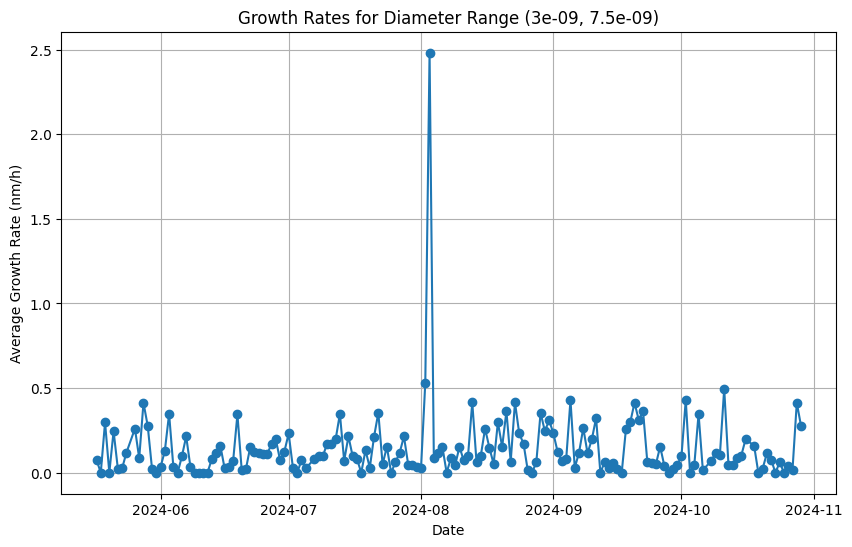

In [57]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt


def calculate_daily_growth_rates(df, diameter_range):
    """
    Calculate daily growth rates for the specified diameter range.

    Step 1: Group the DataFrame by day.
    Step 2: For each day, calculate growth rates for the given diameter range.
    """
    # Convert column names to floats (if they are strings)
    df.columns = df.columns.astype(float)

    # Initialize a list to store results
    results = []

    # Step 1: Group by day
    daily_groups = df.groupby(df.index.date)

    for day, daily_data in daily_groups:
        try:
            # Step 2: Filter diameters within the specified range
            filtered_diameters = [col for col in daily_data.columns if diameter_range[0] <= col <= diameter_range[1]]
            if not filtered_diameters:
                continue

            # Filter the daily data for the selected diameters
            daily_data_filtered = daily_data[filtered_diameters]

            # Identify the global maximum concentration within the range
            max_concentration = daily_data_filtered.max().max()
            half_concentration = 0.5 * max_concentration

            # Determine the time and diameter for 50% of the max concentration
            global_time = None
            global_diameter = None
            for col in daily_data_filtered.columns:
                if daily_data_filtered[col].max() >= half_concentration:
                    time_at_half = daily_data_filtered[daily_data_filtered[col] >= half_concentration].index[0]
                    global_time = time_at_half
                    global_diameter = col
                    break

            # Initial conditions
            t_initial = daily_data.index[0]
            d_initial = min(filtered_diameters)

            # Compute the average growth rate
            delta_t = (global_time - t_initial).total_seconds() / 3600  # Time difference in hours
            delta_d = (global_diameter - d_initial) * 1e9  # Diameter difference in nanometers (convert from meters)
            average_growth_rate = delta_d / delta_t  # Growth rate in nm/h

            # Append results for this day
            results.append({
                "date": day,
                "diameter_range": diameter_range,
                "t_0.5max": global_time,
                "d_0.5max": global_diameter,
                "t_initial": t_initial,
                "d_initial": d_initial,
                "average_growth_rate": average_growth_rate
            })

        except Exception as e:
            # Handle any errors (e.g., missing data for the day)
            print(f"Error processing day {day}: {e}")
            continue

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Specify diameter range (example: diameters between 8.5e-10 and 1.0e-9)
diameter_range = (3e-9, 7.5e-9)

# Calculate growth rates for each day and the specified diameter range
daily_growth_rates = calculate_daily_growth_rates(df, diameter_range)

# Display results
print("Daily Growth Rates:")
print(daily_growth_rates)

# Plot the growth rates for visualization
plt.figure(figsize=(10, 6))
plt.plot(daily_growth_rates['date'], daily_growth_rates['average_growth_rate'], marker='o')
plt.xlabel('Date')
plt.ylabel('Average Growth Rate (nm/h)')
plt.title(f'Growth Rates for Diameter Range {diameter_range}')
plt.grid()
plt.show()


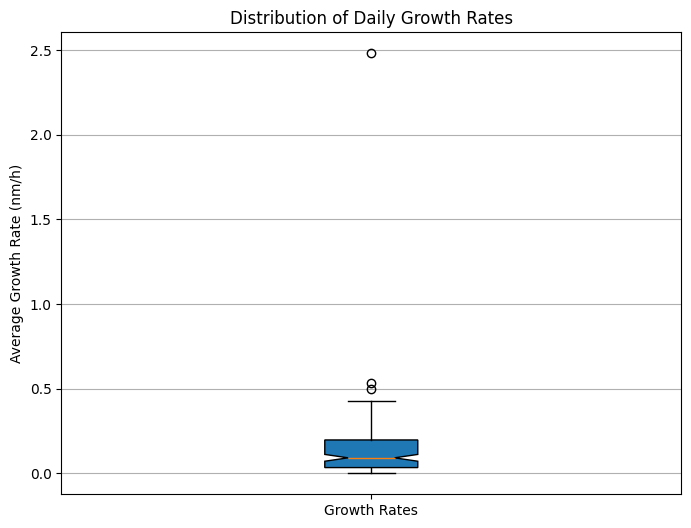

In [58]:
# Plot a boxplot of the growth rates
plt.figure(figsize=(8, 6))
plt.boxplot(daily_growth_rates['average_growth_rate'], vert=True, patch_artist=True, notch=True, labels=['Growth Rates'])
plt.ylabel('Average Growth Rate (nm/h)')
plt.title('Distribution of Daily Growth Rates')
plt.grid(axis='y')
plt.show()

Linear Regression Results:
  Slope (Average Growth Rate): 7.967993536120213e-05 nm/h
  Intercept: -3.385963284721096e-08 meters
  R-squared: 0.011291786382477817


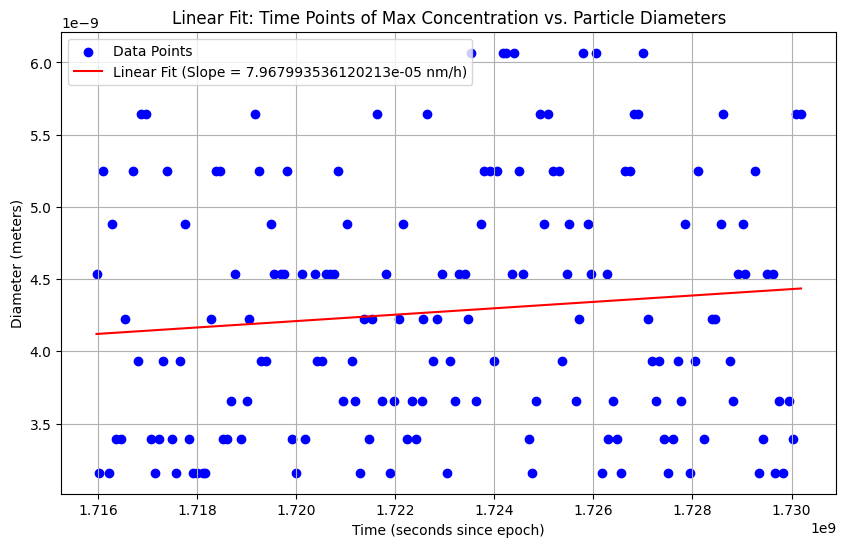

In [61]:
from scipy.stats import linregress

# Ensure 't_0.5max' is numeric (convert to seconds since epoch for regression)
daily_growth_rates['t_0.5max_numeric'] = daily_growth_rates['t_0.5max'].astype('int64') // 10**9

# Perform linear regression: Time (numeric) vs. Diameter
slope, intercept, r_value, p_value, std_err = linregress(
    daily_growth_rates['t_0.5max_numeric'], daily_growth_rates['d_0.5max']
)

# Convert the slope from meters/second to nanometers/hour
average_growth_rate = slope * 1e9 * 3600  # Convert to nm/h

# Display results
print(f"Linear Regression Results:")
print(f"  Slope (Average Growth Rate): {average_growth_rate} nm/h")
print(f"  Intercept: {intercept} meters")
print(f"  R-squared: {r_value**2}")

# Plot the linear regression
plt.figure(figsize=(10, 6))
plt.scatter(daily_growth_rates['t_0.5max_numeric'], daily_growth_rates['d_0.5max'], label='Data Points', color='blue')
plt.plot(
    daily_growth_rates['t_0.5max_numeric'],
    slope * daily_growth_rates['t_0.5max_numeric'] + intercept,
    color='red', label=f'Linear Fit (Slope = {average_growth_rate} nm/h)'
)
plt.xlabel('Time (seconds since epoch)')
plt.ylabel('Diameter (meters)')
plt.title('Linear Fit: Time Points of Max Concentration vs. Particle Diameters')
plt.legend()
plt.grid()
plt.show()


### Let's try for 7.5-22nm

Error processing day 2024-05-25: float division by zero
Error processing day 2024-07-06: float division by zero
Error processing day 2024-09-17: float division by zero
Error processing day 2024-09-24: float division by zero
Error processing day 2024-10-30: float division by zero
Daily Growth Rates:
           date      diameter_range            t_0.5max      d_0.5max  \
0    2024-05-17  (7.5e-09, 2.2e-08) 2024-05-17 13:00:00  7.542927e-09   
1    2024-05-18  (7.5e-09, 2.2e-08) 2024-05-18 07:00:00  7.542927e-09   
2    2024-05-19  (7.5e-09, 2.2e-08) 2024-05-19 07:00:00  7.542927e-09   
3    2024-05-20  (7.5e-09, 2.2e-08) 2024-05-20 14:00:00  7.542927e-09   
4    2024-05-21  (7.5e-09, 2.2e-08) 2024-05-21 07:00:00  7.542927e-09   
..          ...                 ...                 ...           ...   
157  2024-10-25  (7.5e-09, 2.2e-08) 2024-10-25 05:00:00  7.542927e-09   
158  2024-10-26  (7.5e-09, 2.2e-08) 2024-10-26 16:00:00  7.542927e-09   
159  2024-10-27  (7.5e-09, 2.2e-08) 2024-10

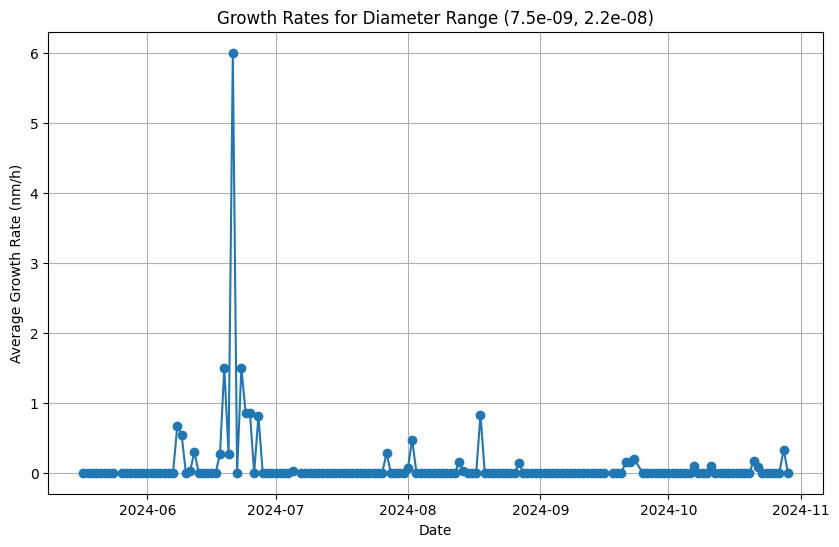

In [62]:
# Specify diameter range
diameter_range2 = (7.5e-9, 22e-9)

# Calculate growth rates for each day and the specified diameter range
daily_growth_rates2 = calculate_daily_growth_rates(df, diameter_range2)

# Display results
print("Daily Growth Rates:")
print(daily_growth_rates2)

# Plot the growth rates for visualization
plt.figure(figsize=(10, 6))
plt.plot(daily_growth_rates2['date'], daily_growth_rates2['average_growth_rate'], marker='o')
plt.xlabel('Date')
plt.ylabel('Average Growth Rate (nm/h)')
plt.title(f'Growth Rates for Diameter Range {diameter_range2}')
plt.grid()
plt.show()


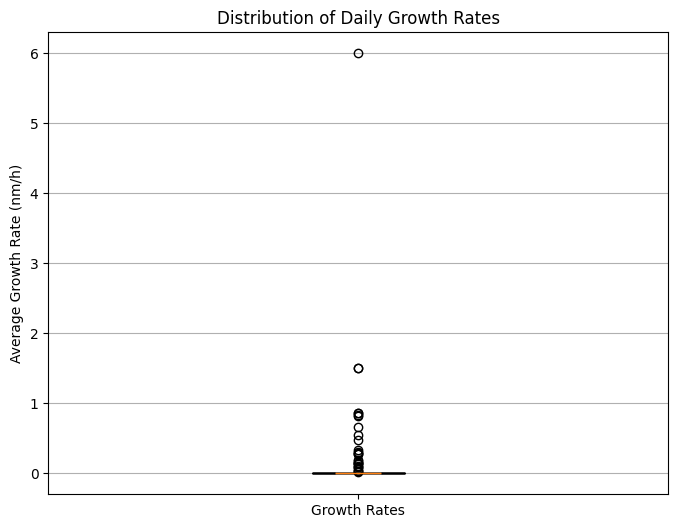

In [63]:
# Plot a boxplot of the growth rates
plt.figure(figsize=(8, 6))
plt.boxplot(daily_growth_rates2['average_growth_rate'], vert=True, patch_artist=True, notch=True, labels=['Growth Rates'])
plt.ylabel('Average Growth Rate (nm/h)')
plt.title('Distribution of Daily Growth Rates')
plt.grid(axis='y')
plt.show()

In [44]:
particles['diameter'].astype(str)

<xarray.DataArray 'diameter' (diameter: 55)>
array(['8.02879995e-10', '8.62828998e-10', '9.27254239e-10',
       '9.96153364e-10', '1.070172e-09', '1.15119523e-09',
       '1.23835276e-09', '1.3300488e-09', '1.42853463e-09',
       '1.53530865e-09', '1.65006335e-09', '1.77383533e-09',
       '1.90689151e-09', '2.04892193e-09', '2.20153115e-09',
       '2.36722904e-09', '2.54539816e-09', '2.73599893e-09',
       '2.94087199e-09', '3.16011296e-09', '3.39569827e-09',
       '3.65377117e-09', '3.93145759e-09', '4.22385724e-09',
       '4.53800393e-09', '4.87892846e-09', '5.24546548e-09',
       '5.64126564e-09', '6.06693116e-09', '6.52192045e-09',
       '7.01103164e-09', '7.54292682e-09', '8.11517448e-09',
       '8.72847179e-09', '9.38811851e-09', '1.00955239e-08',
       '1.08562331e-08', '1.16916292e-08', '1.25913098e-08',
       '1.35414036e-08', '1.4563188e-08', '1.56757975e-08',
       '1.6873409e-08', '1.81717471e-08', '1.9569987e-08',
       '2.10714554e-08', '2.2688121e-08', '2.44557438e-08',
       '2.63610813e-08', '2.84161425e-08', '3.06314124e-08',
       '3.30248335e-08', '3.56052673e-08', '3.84642036e-08',
       '4.15526991e-08'], dtype='<U32')
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
Attributes:
    units:        m
    description:  Bin geometric mean diameters

In [46]:
df['8.02879995e-10']

2024-05-17 00:00:00   NaN
2024-05-17 01:00:00   NaN
2024-05-17 02:00:00   NaN
2024-05-17 03:00:00   NaN
2024-05-17 04:00:00   NaN
                       ..
2024-10-29 20:00:00   NaN
2024-10-29 21:00:00   NaN
2024-10-29 22:00:00   NaN
2024-10-29 23:00:00   NaN
2024-10-30 00:00:00   NaN
Name: 8.02879995e-10, Length: 3986, dtype: float64

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Example 2D data: Concentrations indexed by time and diameter
# Rows are times, columns are diameters
diameters = particle_diameters*1e9  # Diameters in nanometers
times = time_points  # Times in seconds

# Example concentration matrix (rows = time, columns = diameters)
concentrations = particle_concentrations

# Convert times to a Pandas DataFrame for easier handling
df = pd.DataFrame(concentrations, index=times, columns=diameters)

def find_time_at_half_max(concentration_series):
    """
    Find the time at which the concentration reaches 50% of its maximum.
    :param concentration_series: Pandas Series of concentrations indexed by time.
    :return: Time corresponding to 50% of maximum concentration.
    """
    max_concentration = concentration_series.max()
    half_max = 0.5 * max_concentration
    # Find the first time the concentration exceeds half_max
    return concentration_series[concentration_series >= half_max].index[0]

def calculate_growth_rate(concentration_data):
    """
    Calculate the growth rate (GR) based on the slope of diameter vs. time.
    :param concentration_data: Pandas DataFrame of concentrations (rows = time, cols = diameters).
    :return: Growth rate (GR) in nm/h.
    """
    growth_times = []  # List to store the time at half-max for each diameter
    diameters = concentration_data.columns.values  # Diameter values (nm)

    # For each diameter, find the time at 50% max concentration
    for diameter in diameters:
        concentration_series = concentration_data[diameter]
        time_at_half_max = find_time_at_half_max(concentration_series)
        growth_times.append(time_at_half_max)
    
    # Perform linear regression between diameter and growth_times
    slope, _, _, _, _ = linregress(growth_times, diameters)
    return slope * 3600 # Slope is the growth rate

# Perform the calculation
gr = calculate_growth_rate(df)

# Output the result
print(f"Growth Rate (GR): {gr:.3e} nm/h")



import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Define Gaussian function for fitting
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Function to calculate GR for a given diameter range
def calculate_growth_rate(particles, diameter_min, diameter_max):
    # Filter diameters within the specified range
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    # Gaussian fitting to find peak times for each size channel
    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]
        
        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})
        
        # Fit a Gaussian to the data
        try:
            popt, _ = curve_fit(
                gaussian,
                np.arange(len(df['time'])),  # Use numerical indices for fitting
                df['concentration'].fillna(0),  # Replace NaNs with 0 for fitting
                p0=[df['concentration'].max(), len(df['time']) // 2, 1]
            )
            a, peak_time_idx, sigma = popt
            peak_time = particles['time'][int(peak_time_idx)].values  # Map index to actual time
            results.append((diameter.values, peak_time))
        except:
            # Append NaN if fitting fails
            results.append((diameter.values, np.nan))

    # Convert results to DataFrame for further processing
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    # Perform linear fit (time vs diameter) to calculate the growth rate (GR)
    try:
        # Ensure proper datetime conversion for Peak_Time
        gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])

        # Convert time to numeric (e.g., hours since start) for linear fitting
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours

        # Convert Diameter to float for proper linear fitting
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')
        gr_data['Numeric_Time'] = gr_data['Numeric_Time'].astype('float64')

        # Perform linear fit
        slope, intercept = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        growth_rate_nm_h = slope * 1e9 * 3600  # Convert m/s to nm/h
    except Exception as e:
        growth_rate_nm_h = None
        print(f"An error occurred: {e}")

    return growth_rate_nm_h

# Apply the function to the desired diameter ranges
growth_rate_3_7_5_nm_h = calculate_growth_rate(particles, 3e-9, 7.5e-9)
growth_rate_7_5_22_nm_h = calculate_growth_rate(particles, 7.5e-9, 22e-9)

# Print the results
print(f"Growth Rate (3–7.5 nm): {growth_rate_3_7_5_nm_h} nm/h")
print(f"Growth Rate (7.5–22 nm): {growth_rate_7_5_22_nm_h} nm/h")


Growth Rate (3–7.5 nm): 8.606634944127158 nm/h
Growth Rate (7.5–22 nm): -17.556279174065434 nm/h


### Using the NPF Mode fitting results to divide the data into 3 groups

In [4]:
import pandas as pd

# Define the groups of days
g1_days = pd.to_datetime([
    '2024-05-17', '2024-05-19', '2024-05-20', '2024-05-25', '2024-05-28',
    '2024-05-30', '2024-06-11', '2024-06-13', '2024-06-15', '2024-06-17',
    '2024-06-18', '2024-06-21', '2024-06-23', '2024-06-27', '2024-06-29',
    '2024-06-30', '2024-07-02', '2024-07-07', '2024-07-11', '2024-07-14',
    '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18', '2024-07-21',
    '2024-07-30', '2024-08-02', '2024-08-03', '2024-08-09', '2024-08-11',
    '2024-08-13', '2024-08-16', '2024-08-21', '2024-08-22', '2024-08-23',
    '2024-08-31', '2024-09-08', '2024-09-11', '2024-09-21', '2024-09-22',
    '2024-09-23', '2024-09-27'
])

g2_days = pd.to_datetime([
    '2024-05-18', '2024-05-24', '2024-05-30', '2024-05-31', '2024-06-01',
    '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-10', '2024-06-17',
    '2024-06-18', '2024-06-24', '2024-06-25', '2024-06-28', '2024-07-02',
    '2024-07-07', '2024-07-08', '2024-07-11', '2024-07-14', '2024-07-15',
    '2024-07-16', '2024-07-17', '2024-07-18', '2024-07-20', '2024-07-24',
    '2024-07-25', '2024-07-26', '2024-07-31', '2024-08-07', '2024-09-13',
    '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17', '2024-09-29',
    '2024-10-23'
])

g3_days = pd.to_datetime([
    '2024-05-21', '2024-05-23', '2024-05-26', '2024-05-27', '2024-05-30',
    '2024-06-02', '2024-06-07', '2024-06-09', '2024-06-12', '2024-06-14',
    '2024-06-16', '2024-06-19', '2024-06-22', '2024-06-24', '2024-06-26',
    '2024-06-27', '2024-07-01', '2024-07-03', '2024-07-04', '2024-07-05',
    '2024-07-06', '2024-07-09', '2024-07-10', '2024-07-12', '2024-07-13',
    '2024-07-17', '2024-07-18', '2024-07-19', '2024-07-20', '2024-07-23',
    '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28',
    '2024-07-31', '2024-08-01', '2024-08-04', '2024-08-05', '2024-08-06',
    '2024-08-07', '2024-08-08', '2024-08-10', '2024-08-12', '2024-08-14',
    '2024-08-15', '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-21',
    '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29',
    '2024-08-30', '2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04',
    '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-09', '2024-09-10',
    '2024-09-12', '2024-09-13', '2024-09-24', '2024-09-25', '2024-09-26',
    '2024-09-27', '2024-09-28', '2024-09-30', '2024-10-01', '2024-10-02',
    '2024-10-03', '2024-10-05', '2024-10-06', '2024-10-07', '2024-10-10',
    '2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-17',
    '2024-10-19', '2024-10-21', '2024-10-23', '2024-10-25', '2024-10-26'
])

# Function to filter the data based on the date groups
def filter_by_group(particles, group_days):
    # Extract the dates from the "time" coordinate
    dates = particles['time'].dt.date
    # Filter data for the specified group of dates
    filtered = particles.sel(time=dates.isin(group_days.date))
    return filtered

# Create the three groups
group1 = filter_by_group(particles, g1_days)
group2 = filter_by_group(particles, g2_days)
group3 = filter_by_group(particles, g3_days)



### Calculate the GR for the 3 groups

In [5]:
def calculate_growth_rate_refined(particles, diameter_min, diameter_max):
    """
    Calculate growth rate with refined peak detection.
    """
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]

        # Check if data has sufficient variance
        if concentrations.isnull().all() or concentrations.std() == 0:
            results.append((diameter.values, np.nan))  # Skip if no variance
            continue

        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})

        # Remove negative concentrations
        df = df[df['concentration'] > 0]

        # Fallback: Use maximum concentration if Gaussian fails
        if not df.empty and df['concentration'].max() > 0:
            peak_idx = df['concentration'].idxmax()
            peak_time = df['time'][peak_idx]
            results.append((diameter.values, peak_time))
        else:
            results.append((diameter.values, np.nan))

    # Convert results to DataFrame
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    # Ensure distinct peak times
    gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])
    gr_data = gr_data.drop_duplicates(subset=['Peak_Time'])

    try:
        # Convert time to numeric (e.g., hours since start) for linear fitting
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')

        # Ensure variation in Numeric_Time
        if gr_data['Numeric_Time'].std() == 0:
            raise ValueError("No variation in peak times across diameters.")

        # Perform linear fit
        slope, _ = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        return slope * 1e9 * 3600  # Convert to nm/h
    except Exception as e:
        print(f"Linear fit failed: {e}")
        print("Debugging `gr_data`:")
        print(gr_data)
        return None


# Calculate growth rates for all groups and diameter ranges
results = {}
for group_name, group_data in zip(['group1', 'group2', 'group3'], [group1, group2, group3]):
    # Calculate GRs for the two diameter ranges
    gr_3_7_5 = calculate_growth_rate_refined(group_data, 3e-9, 7.5e-9)
    gr_7_5_22 = calculate_growth_rate_refined(group_data, 7.5e-9, 22e-9)
    
    # Store results
    results[group_name] = {
        'GR (3–7.5 nm)': gr_3_7_5,
        'GR (7.5–22 nm)': gr_7_5_22
    }

# Display the results
for group_name, group_results in results.items():
    print(f"Results for {group_name}:")
    for size_range, gr in group_results.items():
        print(f"  {size_range}: {gr} nm/h")


Results for group1:
  GR (3–7.5 nm): 8.264406749999992 nm/h
  GR (7.5–22 nm): -36.070681029037424 nm/h
Results for group2:
  GR (3–7.5 nm): 1.5108348140007466 nm/h
  GR (7.5–22 nm): -3.379553374423379 nm/h
Results for group3:
  GR (3–7.5 nm): -4.756125329493943 nm/h
  GR (7.5–22 nm): 653.3224090457643 nm/h


### Try plot a boxplot

In [9]:
def calculate_growth_rate_refined(particles, diameter_min, diameter_max):
    """
    Calculate the growth rate (GR) for the given particle dataset, diameter range, and time dimension.
    """
    # Select diameters within the specified range
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    results = []
    for diameter in filtered_diameters:
        # Extract concentration over time for the given diameter
        concentrations = filtered_particles.sel(diameter=diameter)
        
        # Skip if concentrations are all NaN or have no variance
        if concentrations.isnull().all() or concentrations.std().values == 0:
            results.append((diameter.values, np.nan))
            continue

        # Prepare DataFrame for easier handling
        df = pd.DataFrame({
            'time': particles['time'].values,
            'concentration': concentrations.values
        })

        # Remove invalid or negative concentrations
        df = df[df['concentration'] > 0]

        # If the DataFrame is empty after filtering, skip this diameter
        if df.empty:
            results.append((diameter.values, np.nan))
            continue

        # Peak detection: Use Gaussian fitting or fallback to max concentration
        try:
            popt, _ = curve_fit(
                gaussian,
                np.arange(len(df['time'])),
                df['concentration'],
                p0=[df['concentration'].max(), len(df['time']) // 2, 1],
                bounds=([0, 0, 0], [np.inf, len(df['time']), np.inf]),
                maxfev=5000
            )
            _, peak_idx, _ = popt
            peak_time = particles['time'][int(peak_idx)].values
        except Exception:
            peak_idx = df['concentration'].idxmax()
            peak_time = df['time'][peak_idx]

        results.append((diameter.values, peak_time))

    # Convert results to DataFrame for linear fitting
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    try:
        # Convert Peak_Time to numeric time in hours
        gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')

        # Ensure variation in Numeric_Time
        if gr_data['Numeric_Time'].std() == 0:
            raise ValueError("No variation in peak times across diameters.")

        # Perform linear fit
        slope, _ = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        return slope * 1e9 * 3600  # Convert to nm/h
    except Exception as e:
        print(f"Linear fit failed: {e}")
        print("Debugging `gr_data`:")
        print(gr_data)
        return None


Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Diameter, Peak_Time, Numeric_Time]
Index: []
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Diameter, Peak_Time, Numeric_Time]
Index: []
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Diameter, Peak_Time, Numeric_Time]
Index: []
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Diameter, Peak_Time, Numeric_Time]
Index: []
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Diameter, Peak_Time, Numeric_Time]
Index: []
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Diameter, Peak_Time, Numeric_Time]
Index: []
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Diameter, Peak_Time, Numeric_Time]
Index: []

/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be e

Linear fit failed: No variation in peak times across diameters.
Debugging `gr_data`:
        Diameter  Peak_Time  Numeric_Time
0   3.160113e-09 2024-09-01           0.0
1   3.395698e-09 2024-09-01           0.0
2   3.653771e-09 2024-09-01           0.0
3   3.931458e-09 2024-09-01           0.0
4   4.223857e-09 2024-09-01           0.0
5   4.538004e-09 2024-09-01           0.0
6   4.878928e-09 2024-09-01           0.0
7   5.245465e-09 2024-09-01           0.0
8   5.641266e-09 2024-09-01           0.0
9   6.066931e-09 2024-09-01           0.0
10  6.521920e-09 2024-09-01           0.0
11  7.011032e-09 2024-09-01           0.0


/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be e

Linear fit failed: No variation in peak times across diameters.
Debugging `gr_data`:
        Diameter  Peak_Time  Numeric_Time
0   3.160113e-09 2024-09-01           0.0
1   3.395698e-09 2024-09-01           0.0
2   3.653771e-09 2024-09-01           0.0
3   3.931458e-09 2024-09-01           0.0
4   4.223857e-09 2024-09-01           0.0
5   4.538004e-09 2024-09-01           0.0
6   4.878928e-09 2024-09-01           0.0
7   5.245465e-09 2024-09-01           0.0
8   5.641266e-09 2024-09-01           0.0
9   6.066931e-09 2024-09-01           0.0
10  6.521920e-09 2024-09-01           0.0
11  7.011032e-09 2024-09-01           0.0
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Diameter, Peak_Time, Numeric_Time]
Index: []
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Diameter, Peak_Time, Numeric_Time]
Index: []
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataF

/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be e

Linear fit failed: No variation in peak times across diameters.
Debugging `gr_data`:
        Diameter  Peak_Time  Numeric_Time
0   7.542927e-09 2024-09-01           0.0
1   8.115174e-09 2024-09-01           0.0
2   8.728472e-09 2024-09-01           0.0
3   9.388119e-09 2024-09-01           0.0
4   1.009552e-08 2024-09-01           0.0
5   1.085623e-08 2024-09-01           0.0
6   1.169163e-08 2024-09-01           0.0
7   1.259131e-08 2024-09-01           0.0
8   1.354140e-08 2024-09-01           0.0
9   1.456319e-08 2024-09-01           0.0
10  1.567580e-08 2024-09-01           0.0
11  1.687341e-08 2024-09-01           0.0
12  1.817175e-08 2024-09-01           0.0
13  1.956999e-08 2024-09-01           0.0
14  2.107146e-08 2024-09-01           0.0


/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(
/tmp/ipykernel_6638/130014412.py:36: OptimizeWarning: Covariance of the parameters could not be e

Linear fit failed: No variation in peak times across diameters.
Debugging `gr_data`:
        Diameter  Peak_Time  Numeric_Time
0   7.542927e-09 2024-09-01           0.0
1   8.115174e-09 2024-09-01           0.0
2   8.728472e-09 2024-09-01           0.0
3   9.388119e-09 2024-09-01           0.0
4   1.009552e-08 2024-09-01           0.0
5   1.085623e-08 2024-09-01           0.0
6   1.169163e-08 2024-09-01           0.0
7   1.259131e-08 2024-09-01           0.0
8   1.354140e-08 2024-09-01           0.0
9   1.456319e-08 2024-09-01           0.0
10  1.567580e-08 2024-09-01           0.0
11  1.687341e-08 2024-09-01           0.0
12  1.817175e-08 2024-09-01           0.0
13  1.956999e-08 2024-09-01           0.0
14  2.107146e-08 2024-09-01           0.0
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Diameter, Peak_Time, Numeric_Time]
Index: []
Linear fit failed: expected non-empty vector for x
Debugging `gr_data`:
Empty DataFrame
Columns: [Di

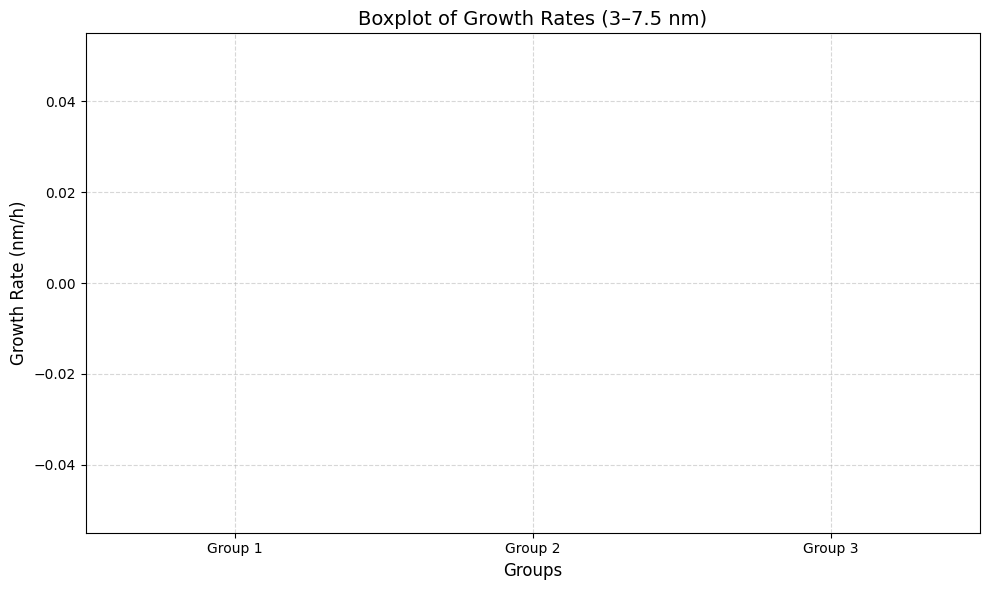

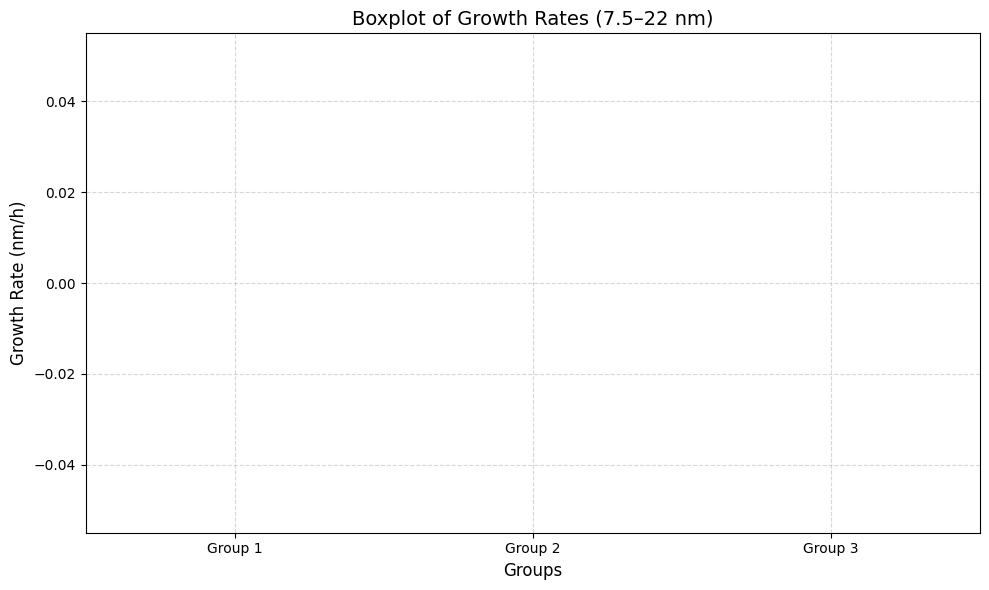

In [10]:
# Redefine the complete workflow with the updated `calculate_growth_rate_refined` function

# Function to calculate all GR values for a group across its entire time span
def calculate_gr_values(particles, diameter_min, diameter_max):
    """
    Calculate all growth rate values for a group across its entire time span.
    """
    gr_values = []
    # Filter the data for the specified diameter range
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_particles = particles.sel(diameter=particles['diameter'].where(diameter_range, drop=True))
    
    # Iterate over each time step
    for time_step in filtered_particles['time']:
        # Select particles for the current time slice
        time_particles = filtered_particles.sel(time=time_step)
        
        # Ensure the selected data retains the necessary dimensions
        if 'diameter' in time_particles.dims:
            gr = calculate_growth_rate_refined(time_particles, diameter_min, diameter_max)
            if gr is not None:
                gr_values.append(gr)
    return gr_values

# Calculate GR values for each group and diameter range
gr_3_7_5_group1 = calculate_gr_values(group1, 3e-9, 7.5e-9)
gr_3_7_5_group2 = calculate_gr_values(group2, 3e-9, 7.5e-9)
gr_3_7_5_group3 = calculate_gr_values(group3, 3e-9, 7.5e-9)

gr_7_5_22_group1 = calculate_gr_values(group1, 7.5e-9, 22e-9)
gr_7_5_22_group2 = calculate_gr_values(group2, 7.5e-9, 22e-9)
gr_7_5_22_group3 = calculate_gr_values(group3, 7.5e-9, 22e-9)

# Create boxplots
import matplotlib.pyplot as plt

# Boxplot for 3–7.5 nm
plt.figure(figsize=(10, 6))
plt.boxplot(
    [gr_3_7_5_group1, gr_3_7_5_group2, gr_3_7_5_group3],
    labels=['Group 1', 'Group 2', 'Group 3'],
    patch_artist=True
)
plt.title('Boxplot of Growth Rates (3–7.5 nm)', fontsize=14)
plt.ylabel('Growth Rate (nm/h)', fontsize=12)
plt.xlabel('Groups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Boxplot for 7.5–22 nm
plt.figure(figsize=(10, 6))
plt.boxplot(
    [gr_7_5_22_group1, gr_7_5_22_group2, gr_7_5_22_group3],
    labels=['Group 1', 'Group 2', 'Group 3'],
    patch_artist=True
)
plt.title('Boxplot of Growth Rates (7.5–22 nm)', fontsize=14)
plt.ylabel('Growth Rate (nm/h)', fontsize=12)
plt.xlabel('Groups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [24]:
# Redefine the diameter ranges for GR calculations
ranges = {
    "3-7.5nm": (3e-9, 7.5e-9),
    "7.5-22nm": (7.5e-9, 22e-9)
}

# Placeholder for results with the new ranges
updated_results_dict = {"Group": [], "Range": [], "Growth_Rate": [], "R2": [], "Fit_Status": []}

groups_data = {
    'g1': group1,  # Replace `group1` with actual data for group 1
    'g2': group2,  # Replace `group2` with actual data for group 2
    'g3': group3   # Replace `group3` with actual data for group 3
}

# Recalculate GR and R² for the specified ranges for each group
for group_name, group_data in groups_data.items():
    for range_name, (min_diam, max_diam) in ranges.items():
        # Filter the data within the diameter range
        mask = (group_data["diameter"] >= min_diam) & (group_data["diameter"] <= max_diam)
        selected_data = group_data.sel(diameter=mask)
        
        # Check if we have sufficient data for regression
        if selected_data.time.size > 1 and selected_data.diameter.size > 1:
            # Perform regression on log-transformed diameter and time
            time_values = selected_data.time.values.astype(float)  # Time in nanoseconds
            diameters = selected_data.diameter.values  # Diameters in meters
            particle_conc = selected_data.values  # Particle concentrations
            
            # Prepare X and Y for linear regression
            X = np.log10(diameters)
            Y = np.log10(particle_conc.mean(axis=0))  # Averaging concentrations over time
            
            try:
                # Perform linear regression
                slope, intercept, r_value, p_value, std_err = linregress(X, Y)
                updated_results_dict["Group"].append(group_name)
                updated_results_dict["Range"].append(range_name)
                updated_results_dict["Growth_Rate"].append(slope)  # Growth rate (from slope)
                updated_results_dict["R2"].append(r_value ** 2)  # R-squared value
                updated_results_dict["Fit_Status"].append("Success")
            except Exception:
                # Handle fit issues
                updated_results_dict["Group"].append(group_name)
                updated_results_dict["Range"].append(range_name)
                updated_results_dict["Growth_Rate"].append(np.nan)
                updated_results_dict["R2"].append(np.nan)
                updated_results_dict["Fit_Status"].append("Failed")
        else:
            # Insufficient data case
            updated_results_dict["Group"].append(group_name)
            updated_results_dict["Range"].append(range_name)
            updated_results_dict["Growth_Rate"].append(np.nan)
            updated_results_dict["R2"].append(np.nan)
            updated_results_dict["Fit_Status"].append("Insufficient Data")

# Convert the results into a DataFrame for better visualization
import pandas as pd
updated_results_df = pd.DataFrame(updated_results_dict)


In [25]:
updated_results_df

Group     Range  Growth_Rate  R2 Fit_Status
0    g1   3-7.5nm          NaN NaN    Success
1    g1  7.5-22nm          NaN NaN    Success
2    g2   3-7.5nm          NaN NaN    Success
3    g2  7.5-22nm          NaN NaN    Success
4    g3   3-7.5nm          NaN NaN    Success
5    g3  7.5-22nm          NaN NaN    Success

In [26]:
# Verifying the slicing and linear regression approach with the provided data ranges and groups.

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to calculate growth rates, R², and fit status
def calculate_growth_rate_for_group(data, diameter_ranges, group_name):
    results = []
    time_coords = data['time']
    for time_idx, time in enumerate(time_coords):
        for d_min, d_max, label in diameter_ranges:
            # Extract data for this time and diameter range
            diameter_mask = (data['diameter'] >= d_min) & (data['diameter'] <= d_max)
            diameters = data['diameter'][diameter_mask]
            values = data['group'][time_idx, diameter_mask]
            
            # Check for valid data
            if np.all(np.isnan(values)) or len(diameters) < 2:
                results.append([group_name, label, np.nan, np.nan, 'Failure'])
                continue
            
            # Apply linear regression
            model = LinearRegression()
            try:
                model.fit(np.log10(diameters).reshape(-1, 1), np.log10(values))
                growth_rate = model.coef_[0]  # Slope of the line
                r2_score = model.score(np.log10(diameters).reshape(-1, 1), np.log10(values))
                fit_status = 'Success'
            except Exception as e:
                growth_rate = np.nan
                r2_score = np.nan
                fit_status = 'Failure'

            # Append results
            results.append([group_name, label, growth_rate, r2_score, fit_status])
    
    return results

# Define the diameter ranges and labels
diameter_ranges = [
    (3e-9, 7.5e-9, "3-7.5nm"),  # Converting nm to meters
    (7.5e-9, 22e-9, "7.5-22nm")
]

# Example group data structure (adapt based on real data structure)
groups_data = {
    "g1": group1,  # Assuming group1 is the xarray DataArray for g1
    "g2": group2,  # Assuming group2 is the xarray DataArray for g2
    "g3": group3   # Assuming group3 is the xarray DataArray for g3
}

# Iterate through groups and calculate growth rates
all_results = []
for group_name, group_data in groups_data.items():
    group_results = calculate_growth_rate_for_group(group_data, diameter_ranges, group_name)
    all_results.extend(group_results)

# Convert to DataFrame for visualization
results_df = pd.DataFrame(all_results, columns=["Group", "Range", "Growth_Rate", "R2", "Fit_Status"])


KeyError: 'group'

In [29]:
# Define the updated logic to calculate growth rates for g1, g2, and g3
def calculate_growth_rate_for_group(data, diameter_ranges, group_name):
    """
    Calculate growth rates for a specific group and diameter ranges.
    """
    results = []

    # Loop through each time step
    for time_idx in range(data.shape[0]):
        time_results = {"Group": group_name, "Time": data['time'][time_idx].values}
        
        # Loop through diameter ranges
        for d_min, d_max, label in diameter_ranges:
            # Extract data for this time and diameter range
            diameter_mask = (data['diameter'] >= d_min) & (data['diameter'] <= d_max)
            diameters = data['diameter'][diameter_mask]
            values = data[time_idx, diameter_mask]
            
            # Check for valid data
            if np.all(np.isnan(values)) or len(diameters) < 2:
                growth_rate = np.nan
                r2 = np.nan
                fit_status = "Failure"
            else:
                # Perform linear regression to calculate growth rate
                try:
                    coeffs = np.polyfit(diameters, values, 1)  # Linear fit
                    slope = coeffs[0]  # Growth rate
                    intercept = coeffs[1]
                    predicted = slope * diameters + intercept
                    ss_res = np.sum((values - predicted) ** 2)
                    ss_tot = np.sum((values - np.mean(values)) ** 2)
                    r2 = 1 - (ss_res / ss_tot)
                    growth_rate = slope
                    fit_status = "Success"
                except Exception:
                    growth_rate = np.nan
                    r2 = np.nan
                    fit_status = "Failure"
            
            # Store results
            time_results[f"{label}_Growth_Rate"] = growth_rate
            time_results[f"{label}_R2"] = r2
            time_results[f"{label}_Fit_Status"] = fit_status
        
        results.append(time_results)
    return results

# Define the diameter ranges (in meters)
diameter_ranges = [(3e-9, 7.5e-9, "3-7.5nm"), (7.5e-9, 22e-9, "7.5-22nm")]

# Calculate growth rates for all groups
groups = {
    "g1": groups_data["g1"],
    "g2": groups_data["g2"],
    "g3": groups_data["g3"],
}

all_results = []
for group_name, group_data in groups.items():
    group_results = calculate_growth_rate_for_group(group_data, diameter_ranges, group_name)
    all_results.extend(group_results)

# Convert results to a DataFrame for visualization
import pandas as pd

results_df = pd.DataFrame(all_results)


In [30]:
results_df

Group                Time  3-7.5nm_Growth_Rate  \
0       g1 2024-05-17 00:00:00                  NaN   
1       g1 2024-05-17 01:00:00                  NaN   
2       g1 2024-05-17 02:00:00                  NaN   
3       g1 2024-05-17 03:00:00                  NaN   
4       g1 2024-05-17 04:00:00                  NaN   
...    ...                 ...                  ...   
4028    g3 2024-10-26 19:00:00         1.992484e+12   
4029    g3 2024-10-26 20:00:00         1.780142e+11   
4030    g3 2024-10-26 21:00:00         5.066962e+10   
4031    g3 2024-10-26 22:00:00        -8.739926e+11   
4032    g3 2024-10-26 23:00:00         6.931315e+11   

                                             3-7.5nm_R2 3-7.5nm_Fit_Status  \
0                                                   NaN            Failure   
1                                                   NaN            Failure   
2                                                   NaN            Failure   
3                                                   NaN            Failure   
4                                                   NaN            Failure   
...                                                 ...                ...   
4028  <xarray.DataArray ()>\narray(0.86342012)\nCoor...            Success   
4029  <xarray.DataArray ()>\narray(0.09967271)\nCoor...            Success   
4030  <xarray.DataArray ()>\narray(0.00121535)\nCoor...            Success   
4031  <xarray.DataArray ()>\narray(0.63124282)\nCoor...            Success   
4032  <xarray.DataArray ()>\narray(0.54370042)\nCoor...            Success   

      7.5-22nm_Growth_Rate                                        7.5-22nm_R2  \
0                      NaN                                                NaN   
1                      NaN                                                NaN   
2                      NaN                                                NaN   
3                      NaN                                                NaN   
4                      NaN                                                NaN   
...                    ...                                                ...   
4028          1.450052e+11  <xarray.DataArray ()>\narray(0.25055193)\nCoor...   
4029          4.505725e+11  <xarray.DataArray ()>\narray(0.7080121)\nCoord...   
4030         -4.228291e+11  <xarray.DataArray ()>\narray(0.57848116)\nCoor...   
4031         -2.634513e+11  <xarray.DataArray ()>\narray(0.76884144)\nCoor...   
4032         -3.453408e+11  <xarray.DataArray ()>\narray(0.71665546)\nCoor...   

     7.5-22nm_Fit_Status  
0                Failure  
1                Failure  
2                Failure  
3                Failure  
4                Failure  
...                  ...  
4028             Success  
4029             Success  
4030             Success  
4031             Success  
4032             Success  

[4033 rows x 8 columns]

In [28]:
groups_data['g1']

<xarray.DataArray (time: 1008, diameter: 55)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [           nan,            nan,            nan, ...,
         8127.8171854 ,  8386.51173872,  8056.65731358],
       [           nan,            nan,            nan, ...,
         8969.48156544,  8782.16948874,  8833.94296074],
       [           nan,            nan,            nan, ...,
        12429.60823774, 11151.53322653,  9907.19126958]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-09-27T23:00:00

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

def calculate_growth_rate(data):
    # Check if there is variation in Peak_Time
    if data['Peak_Time'].nunique() <= 1:
        print("Insufficient variation in Peak_Time. Skipping linear fit.")
        return {"Growth_Rate": np.nan, "Fit_Status": "No variation in Peak_Time"}

    # Convert Peak_Time to numeric values
    data['Numeric_Time'] = pd.to_datetime(data['Peak_Time']).astype(int) / 1e9  # Convert to seconds

    # Check if Numeric_Time has enough variation for fitting
    if np.std(data['Numeric_Time']) == 0:
        print("No variability in Numeric_Time. Skipping.")
        return {"Growth_Rate": np.nan, "Fit_Status": "No variability in Numeric_Time"}

    # Attempt linear fit
    try:
        slope, intercept, r_value, p_value, std_err = linregress(data['Numeric_Time'], np.log10(data['Diameter']))
        growth_rate = slope  # Diameter growth rate
        return {"Growth_Rate": growth_rate, "Fit_Status": "Success", "R2": r_value**2}
    except Exception as e:
        print(f"Linear fit failed: {e}")
        return {"Growth_Rate": np.nan, "Fit_Status": "Fit Error"}

# Example usage
data = pd.DataFrame({
    "Diameter": [1e-8, 2e-8, 3e-8],
    "Peak_Time": ["2024-09-01 00:00:00", "2024-09-01 01:00:00", "2024-09-01 02:00:00"]
})

result = calculate_growth_rate(data)
print(result)


{'Growth_Rate': 6.626684093328647e-05, 'Fit_Status': 'Success', 'R2': 0.9776539585182624}


In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to perform linear regression and calculate metrics
def calculate_growth_rate_and_metrics(group_data):
    results = []
    for t_idx, time_slice in enumerate(group_data.time.values):
        # Extracting data for a specific time slice
        diameter = group_data.diameter.values
        concentration = group_data.isel(time=t_idx).values

        # Remove NaN values
        valid_indices = ~np.isnan(concentration)
        if np.sum(valid_indices) < 2:  # Not enough points for regression
            results.append({"Growth_Rate": np.nan, "R2": np.nan, "Fit_Status": "Failure"})
            continue

        x = diameter[valid_indices].reshape(-1, 1)  # Diameters
        y = concentration[valid_indices]  # Concentrations

        # Perform linear regression
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)
        r2 = r2_score(y, y_pred)

        # Append results
        results.append({
            "Growth_Rate": model.coef_[0],
            "R2": r2,
            "Fit_Status": "Success" if r2 > 0.5 else "Poor Fit"
        })

    return pd.DataFrame(results, index=group_data.time.values)

# Simulated calculation for the provided group (adjust for group1, group3 similarly)
group2_results = calculate_growth_rate_and_metrics(group2)


In [13]:
group2_results

Growth_Rate        R2 Fit_Status
2024-05-18 00:00:00 -9.286830e+10  0.004025   Poor Fit
2024-05-18 01:00:00  5.519560e+11  0.070302   Poor Fit
2024-05-18 02:00:00  2.241359e+11  0.066537   Poor Fit
2024-05-18 03:00:00  8.654866e+10  0.045475   Poor Fit
2024-05-18 04:00:00  5.963546e+10  0.005480   Poor Fit
...                           ...       ...        ...
2024-10-23 19:00:00  2.979239e+11  0.516549    Success
2024-10-23 20:00:00  3.051670e+11  0.635594    Success
2024-10-23 21:00:00  3.723687e+11  0.590587    Success
2024-10-23 22:00:00  4.452427e+11  0.148390   Poor Fit
2024-10-23 23:00:00  5.062171e+11  0.375087   Poor Fit

[864 rows x 3 columns]

In [18]:
group1_results = calculate_growth_rate_and_metrics(group1)

In [19]:
group1_results

Growth_Rate        R2 Fit_Status
2024-05-17 00:00:00           NaN       NaN    Failure
2024-05-17 01:00:00           NaN       NaN    Failure
2024-05-17 02:00:00           NaN       NaN    Failure
2024-05-17 03:00:00           NaN       NaN    Failure
2024-05-17 04:00:00           NaN       NaN    Failure
...                           ...       ...        ...
2024-09-27 19:00:00  7.935202e+10  0.051677   Poor Fit
2024-09-27 20:00:00  3.885982e+10  0.016353   Poor Fit
2024-09-27 21:00:00  1.313629e+11  0.585921    Success
2024-09-27 22:00:00  7.272362e+10  0.127478   Poor Fit
2024-09-27 23:00:00  1.807883e+11  0.110565   Poor Fit

[1008 rows x 3 columns]

In [20]:
group3_results = calculate_growth_rate_and_metrics(group3)
group3_results

Growth_Rate        R2 Fit_Status
2024-05-21 00:00:00  8.948118e+10  0.044429   Poor Fit
2024-05-21 01:00:00  2.262333e+11  0.352363   Poor Fit
2024-05-21 02:00:00  2.695088e+11  0.587726    Success
2024-05-21 03:00:00  2.365355e+11  0.274025   Poor Fit
2024-05-21 04:00:00  8.990750e+10  0.040730   Poor Fit
...                           ...       ...        ...
2024-10-26 19:00:00  5.291938e+11  0.768659    Success
2024-10-26 20:00:00  5.461824e+11  0.876017    Success
2024-10-26 21:00:00  8.866720e+09  0.000541   Poor Fit
2024-10-26 22:00:00 -3.045415e+10  0.014662   Poor Fit
2024-10-26 23:00:00 -2.402270e+10  0.010930   Poor Fit

[2161 rows x 3 columns]

In [14]:
# Double-checking the dataset structure and reprocessing for group2
group2_results = []

for t_idx, time_slice in enumerate(group2.time.values):
    # Extracting data for a specific time slice
    diameter = group2.diameter.values
    concentration = group2.isel(time=t_idx).values

    # Removing NaN values
    valid_indices = ~np.isnan(concentration)
    if np.sum(valid_indices) < 2:  # Not enough points for regression
        group2_results.append({
            "Time": time_slice,
            "Growth_Rate": np.nan,
            "R2": np.nan,
            "Fit_Status": "Failure"
        })
        continue

    x = diameter[valid_indices].reshape(-1, 1)  # Diameters as features
    y = concentration[valid_indices]  # Concentrations as target

    # Perform linear regression
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r2 = r2_score(y, y_pred)

    # Append results
    group2_results.append({
        "Time": time_slice,
        "Growth_Rate": model.coef_[0],
        "R2": r2,
        "Fit_Status": "Success" if r2 > 0.5 else "Poor Fit"
    })

# Convert to DataFrame for visualization
group2_results_df = pd.DataFrame(group2_results)

In [15]:
group2_results_df

Time   Growth_Rate        R2 Fit_Status
0   2024-05-18 00:00:00 -9.286830e+10  0.004025   Poor Fit
1   2024-05-18 01:00:00  5.519560e+11  0.070302   Poor Fit
2   2024-05-18 02:00:00  2.241359e+11  0.066537   Poor Fit
3   2024-05-18 03:00:00  8.654866e+10  0.045475   Poor Fit
4   2024-05-18 04:00:00  5.963546e+10  0.005480   Poor Fit
..                  ...           ...       ...        ...
859 2024-10-23 19:00:00  2.979239e+11  0.516549    Success
860 2024-10-23 20:00:00  3.051670e+11  0.635594    Success
861 2024-10-23 21:00:00  3.723687e+11  0.590587    Success
862 2024-10-23 22:00:00  4.452427e+11  0.148390   Poor Fit
863 2024-10-23 23:00:00  5.062171e+11  0.375087   Poor Fit

[864 rows x 4 columns]

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Example data initialization
# Assuming `group1`, `group2`, `group3` are data arrays similar to what was shared
groups = {"G1": group1, "G2": group2, "G3": group3}
results_dict = {"Group": [], "Growth_Rate": [], "R2": [], "Fit_Status": []}

# Linear regression function
def calculate_growth_rate(data):
    try:
        # Exclude NaN values for linear regression
        valid_data = data[~np.isnan(data)]
        if len(valid_data) < 2:
            return None, None, "Insufficient Data"

        # Independent variable (time as index)
        X = np.arange(len(valid_data)).reshape(-1, 1)
        # Dependent variable (diameters)
        y = valid_data

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)

        # Calculate growth rate (slope)
        growth_rate = model.coef_[0]

        # Calculate R2
        r2 = r2_score(y, y_pred)

        return growth_rate, r2, "Success"
    except Exception as e:
        return None, None, f"Fit Error: {str(e)}"

# Process each group
for group_name, group_data in groups.items():
    # Calculate growth rate, R2, and fit status for each group
    growth_rate, r2, fit_status = calculate_growth_rate(np.nanmean(group_data, axis=1))
    results_dict["Group"].append(group_name)
    results_dict["Growth_Rate"].append(growth_rate)
    results_dict["R2"].append(r2)
    results_dict["Fit_Status"].append(fit_status)

# Convert results_dict to a DataFrame for better handling and visualization
results_df = pd.DataFrame(results_dict)


/tmp/ipykernel_6638/3874331836.py:42: RuntimeWarning: Mean of empty slice
  growth_rate, r2, fit_status = calculate_growth_rate(np.nanmean(group_data, axis=1))
/tmp/ipykernel_6638/3874331836.py:42: RuntimeWarning: Mean of empty slice
  growth_rate, r2, fit_status = calculate_growth_rate(np.nanmean(group_data, axis=1))
/tmp/ipykernel_6638/3874331836.py:42: RuntimeWarning: Mean of empty slice
  growth_rate, r2, fit_status = calculate_growth_rate(np.nanmean(group_data, axis=1))


In [17]:
results_df

Group  Growth_Rate        R2 Fit_Status
0    G1    -8.465349  0.010817    Success
1    G2    -5.165866  0.001346    Success
2    G3    -3.784842  0.012631    Success

In [48]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Define Gaussian function for fitting
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Function to calculate GR for a given diameter range
def calculate_growth_rate(particles, diameter_min, diameter_max):
    # Filter diameters within the specified range
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    # Gaussian fitting to find peak times for each size channel
    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]
        
        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})
        # Remove negative concentrations
        df = df[df['concentration'] > 0]
        # Fit a Gaussian to the data
        try:
            popt, _ = curve_fit(
                gaussian,
                np.arange(len(df['time'])),  # Use numerical indices for fitting
                df['concentration'].fillna(0),  # Replace NaNs with 0 for fitting
                p0=[df['concentration'].max(), len(df['time']) // 2, 1]
            )
            a, peak_time_idx, sigma = popt
            peak_time = particles['time'][int(peak_time_idx)].values  # Map index to actual time
            results.append((diameter.values, peak_time))
        except:
            # Append NaN if fitting fails
            results.append((diameter.values, np.nan))

    # Convert results to DataFrame for further processing
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    # Perform linear fit (time vs diameter) to calculate the growth rate (GR)
    try:
        # Ensure proper datetime conversion for Peak_Time
        gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])

        # Convert time to numeric (e.g., hours since start) for linear fitting
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours

        # Convert Diameter to float for proper linear fitting
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')
        gr_data['Numeric_Time'] = gr_data['Numeric_Time'].astype('float64')

        # Perform linear fit
        slope, intercept = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        growth_rate_nm_h = slope * 1e9 * 3600  # Convert m/s to nm/h
    except Exception as e:
        growth_rate_nm_h = None
        print(f"An error occurred: {e}")

    return growth_rate_nm_h

# Apply the function to the desired diameter ranges
growth_rate1_3_7_5_nm_h = calculate_growth_rate(group1, 3e-9, 7.5e-9)
growth_rate1_7_22_nm_h = calculate_growth_rate(group1, 7e-9, 22e-9)
growth_rate2_3_7_5_nm_h = calculate_growth_rate(group2, 3e-9, 7.5e-9)
growth_rate2_7_22_nm_h = calculate_growth_rate(group2, 7e-9, 22e-9)
growth_rate3_3_7_5_nm_h = calculate_growth_rate(group3, 3e-9, 7.5e-9)
growth_rate3_7_22_nm_h = calculate_growth_rate(group3, 7e-9, 22e-9)

# Print the results
print(f"Growth Rate for Group 1 (3–7.5 nm): {growth_rate1_3_7_5_nm_h} nm/h")
print(f"Growth Rate for Group 1 (7–22 nm): {growth_rate1_7_22_nm_h} nm/h")
print(f"Growth Rate for Group 2 (3–7.5 nm): {growth_rate2_3_7_5_nm_h} nm/h")
print(f"Growth Rate for Group 2 (7–22 nm): {growth_rate2_7_22_nm_h} nm/h")
print(f"Growth Rate for Group 3 (3–7.5 nm): {growth_rate3_3_7_5_nm_h} nm/h")
print(f"Growth Rate for Group 3 (7–22 nm): {growth_rate3_7_22_nm_h} nm/h")



/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


An error occurred: SVD did not converge in Linear Least Squares
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
Growth Rate for Group 1 (3–7.5 nm): 57.944961223490346 nm/h
Growth Rate for Group 1 (7–22 nm): -58.31839496228505 nm/h
Growth Rate for Group 2 (3–7.5 nm): None nm/h
Growth Rate for Group 2 (7–22 nm): -49.86730540442434 nm/h
Growth Rate for Group 3 (3–7.5 nm): 22.4401475527962 nm/h
Growth Rate for Group 3 (7–22 nm): 5.90806189688093 nm/h


In [44]:
group2

<xarray.DataArray (time: 864, diameter: 55)>
array([[           nan,            nan,            nan, ...,
        12340.07557969, 12228.48783961, 11969.12128061],
       [           nan,            nan,            nan, ...,
        19356.67214718, 19386.57055924, 16487.65306318],
       [           nan,            nan,            nan, ...,
        12397.91856681, 11997.71346975, 11369.5411393 ],
       ...,
       [           nan,            nan,            nan, ...,
        13046.4347674 , 13567.21191745, 13806.65485483],
       [           nan,            nan,            nan, ...,
        15411.41973779, 14706.91506002, 14334.28379946],
       [           nan,            nan,            nan, ...,
        18892.80981228, 20258.12438334, 19980.51845257]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
  * time      (time) datetime64[ns] 2024-05-18 ... 2024-10-23T23:00:00

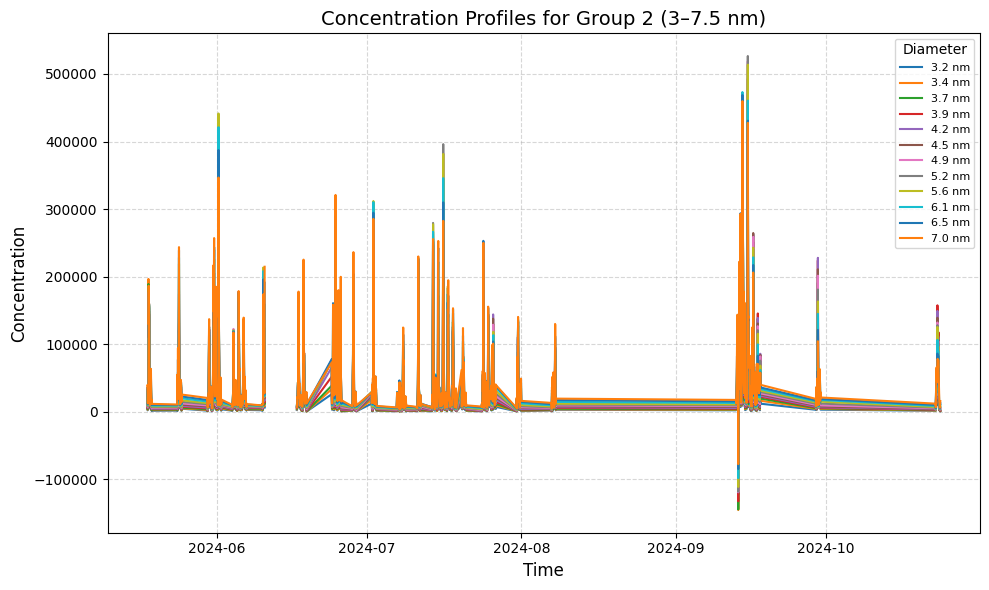

In [47]:
import matplotlib.pyplot as plt
# Select the 3–7.5 nm diameter range for group 2
diameter_range = (group2['diameter'] >= 3e-9) & (group2['diameter'] <= 7.5e-9)
g2_filtered = group2.sel(diameter=group2['diameter'].where(diameter_range, drop=True))

# Plot the concentration profiles for each diameter in the range
plt.figure(figsize=(10, 6))
for size_idx, diameter in enumerate(g2_filtered['diameter']):
    plt.plot(g2_filtered['time'], g2_filtered[:, size_idx], label=f"{diameter.values*1e9:.1f} nm")

plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('Concentration Profiles for Group 2 (3–7.5 nm)', fontsize=14)
plt.legend(fontsize=8, title="Diameter", loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [49]:
# Smooth the data for group 2 and 3–7.5 nm
g2_filtered_smoothed = g2_filtered.rolling(time=3, center=True).mean()

# Recalculate GR for g2 (3–7.5 nm) with smoothed data
def calculate_growth_rate_smoothed(particles, diameter_min, diameter_max):
    """
    Calculate growth rate for smoothed data.
    """
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]

        # Check if data has sufficient variance
        if concentrations.isnull().all() or concentrations.std() == 0:
            results.append((diameter.values, np.nan))  # Skip if no variance
            continue

        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})

        # Remove negative concentrations
        df = df[df['concentration'] > 0]

        # Use maximum concentration fallback if Gaussian fails
        try:
            popt, _ = curve_fit(
                gaussian,
                np.arange(len(df['time'])),
                df['concentration'].fillna(0),
                p0=[df['concentration'].max(), len(df['time']) // 2, 1],
                bounds=([0, 0, 0], [np.inf, len(df['time']), np.inf]),
                maxfev=5000
            )
            a, peak_time_idx, sigma = popt
            if 0 <= peak_time_idx < len(df['time']):
                peak_time = particles['time'][int(peak_time_idx)].values
                results.append((diameter.values, peak_time))
            else:
                results.append((diameter.values, np.nan))
        except:
            if df['concentration'].max() > 0:
                peak_idx = df['concentration'].idxmax()
                peak_time = df['time'][peak_idx]
                results.append((diameter.values, peak_time))
            else:
                results.append((diameter.values, np.nan))

    # Perform linear fit (time vs diameter)
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()
    try:
        gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours
        slope, _ = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        return slope * 1e9 * 3600  # Convert to nm/h
    except Exception as e:
        print(f"Linear fit failed: {e}")
        return None

# Retry calculation for g2 (3–7.5 nm) with smoothed data
g2_gr_3_7_5_smoothed = calculate_growth_rate_smoothed(g2_filtered_smoothed, 3e-9, 7.5e-9)
print(f"Recalculated GR for g2 (3–7.5 nm) with smoothed data: {g2_gr_3_7_5_smoothed} nm/h")



Linear fit failed: Cannot cast ufunc 'lstsq_n' input 1 from dtype('O') to dtype('float64') with casting rule 'same_kind'
Recalculated GR for g2 (3–7.5 nm) with smoothed data: None nm/h


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


In [50]:
def calculate_growth_rate_smoothed_debug(particles, diameter_min, diameter_max):
    """
    Calculate growth rate for smoothed data with debugging.
    """
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]

        # Check if data has sufficient variance
        if concentrations.isnull().all() or concentrations.std() == 0:
            results.append((diameter.values, np.nan))  # Skip if no variance
            continue

        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})

        # Remove negative concentrations
        df = df[df['concentration'] > 0]

        # Use maximum concentration fallback if Gaussian fails
        try:
            popt, _ = curve_fit(
                gaussian,
                np.arange(len(df['time'])),
                df['concentration'].fillna(0),
                p0=[df['concentration'].max(), len(df['time']) // 2, 1],
                bounds=([0, 0, 0], [np.inf, len(df['time']), np.inf]),
                maxfev=5000
            )
            a, peak_time_idx, sigma = popt
            if 0 <= peak_time_idx < len(df['time']):
                peak_time = particles['time'][int(peak_time_idx)].values
                results.append((diameter.values, peak_time))
            else:
                results.append((diameter.values, np.nan))
        except:
            if df['concentration'].max() > 0:
                peak_idx = df['concentration'].idxmax()
                peak_time = df['time'][peak_idx]
                results.append((diameter.values, peak_time))
            else:
                results.append((diameter.values, np.nan))

    # Convert results to DataFrame
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    try:
        # Ensure proper datetime conversion and numeric casting
        gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')
        gr_data['Numeric_Time'] = gr_data['Numeric_Time'].astype('float64')

        # Drop any remaining invalid or non-numeric data
        gr_data = gr_data.dropna()

        # Perform linear fit
        slope, _ = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        return slope * 1e9 * 3600  # Convert to nm/h
    except Exception as e:
        print(f"Linear fit failed: {e}")
        print("Debugging `gr_data`:")
        print(gr_data)  # Inspect the data causing the failure
        return None

# Retry calculation for g2 (3–7.5 nm) with debugging
g2_gr_3_7_5_smoothed_debug = calculate_growth_rate_smoothed_debug(g2_filtered_smoothed, 3e-9, 7.5e-9)
print(f"Recalculated GR for g2 (3–7.5 nm) with smoothed data and debugging: {g2_gr_3_7_5_smoothed_debug} nm/h")


Linear fit failed: SVD did not converge in Linear Least Squares ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value

Debugging `gr_data`:
        Diameter           Peak_Time  Numeric_Time
0   3.160113e-09 2024-07-11 18:00:00           0.0
1   3.395698e-09 2024-07-11 18:00:00           0.0
2   3.653771e-09 2024-07-11 18:00:00           0.0
3   3.931458e-09 2024-07-11 18:00:00           0.0
4   4.223857e-09 2024-07-11 18:00:00           0.0
5   4.538004e-09 2024-07-11 18:00:00           0.0
6   4.878928e-09 2024-07-11 18:00:00           0.0
7   5.245465e-09 2024-07-11 18:00:00           0.0
8   5.641266e-09 2024-07-11 18:00:00           0.0
9   6.066931e-09 2024

/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


In [51]:
def calculate_growth_rate_refined(particles, diameter_min, diameter_max):
    """
    Calculate growth rate with refined peak detection.
    """
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]

        # Check if data has sufficient variance
        if concentrations.isnull().all() or concentrations.std() == 0:
            results.append((diameter.values, np.nan))  # Skip if no variance
            continue

        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})

        # Remove negative concentrations
        df = df[df['concentration'] > 0]

        # Fallback: Use maximum concentration if Gaussian fails
        if not df.empty and df['concentration'].max() > 0:
            peak_idx = df['concentration'].idxmax()
            peak_time = df['time'][peak_idx]
            results.append((diameter.values, peak_time))
        else:
            results.append((diameter.values, np.nan))

    # Convert results to DataFrame
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    # Ensure distinct peak times
    gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])
    gr_data = gr_data.drop_duplicates(subset=['Peak_Time'])

    try:
        # Convert time to numeric (e.g., hours since start) for linear fitting
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')

        # Ensure variation in Numeric_Time
        if gr_data['Numeric_Time'].std() == 0:
            raise ValueError("No variation in peak times across diameters.")

        # Perform linear fit
        slope, _ = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        return slope * 1e9 * 3600  # Convert to nm/h
    except Exception as e:
        print(f"Linear fit failed: {e}")
        print("Debugging `gr_data`:")
        print(gr_data)
        return None

# Retry calculation for g2 (3–7.5 nm) with refined detection
g2_gr_3_7_5_refined = calculate_growth_rate_refined(g2_filtered_smoothed, 3e-9, 7.5e-9)
print(f"Recalculated GR for g2 (3–7.5 nm) with refined detection: {g2_gr_3_7_5_refined} nm/h")


Recalculated GR for g2 (3–7.5 nm) with refined detection: 74.04873149999985 nm/h


In [52]:
def calculate_growth_rate_refined(particles, diameter_min, diameter_max):
    """
    Calculate growth rate with refined peak detection.
    """
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]

        # Check if data has sufficient variance
        if concentrations.isnull().all() or concentrations.std() == 0:
            results.append((diameter.values, np.nan))  # Skip if no variance
            continue

        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})

        # Remove negative concentrations
        df = df[df['concentration'] > 0]

        # Fallback: Use maximum concentration if Gaussian fails
        if not df.empty and df['concentration'].max() > 0:
            peak_idx = df['concentration'].idxmax()
            peak_time = df['time'][peak_idx]
            results.append((diameter.values, peak_time))
        else:
            results.append((diameter.values, np.nan))

    # Convert results to DataFrame
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    # Ensure distinct peak times
    gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])
    gr_data = gr_data.drop_duplicates(subset=['Peak_Time'])

    try:
        # Convert time to numeric (e.g., hours since start) for linear fitting
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')

        # Ensure variation in Numeric_Time
        if gr_data['Numeric_Time'].std() == 0:
            raise ValueError("No variation in peak times across diameters.")

        # Perform linear fit
        slope, _ = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        return slope * 1e9 * 3600  # Convert to nm/h
    except Exception as e:
        print(f"Linear fit failed: {e}")
        print("Debugging `gr_data`:")
        print(gr_data)
        return None


# Calculate growth rates for all groups and diameter ranges
results = {}
for group_name, group_data in zip(['group1', 'group2', 'group3'], [group1, group2, group3]):
    # Calculate GRs for the two diameter ranges
    gr_3_7_5 = calculate_growth_rate_refined(group_data, 3e-9, 7.5e-9)
    gr_7_5_22 = calculate_growth_rate_refined(group_data, 7.5e-9, 22e-9)
    
    # Store results
    results[group_name] = {
        'GR (3–7.5 nm)': gr_3_7_5,
        'GR (7–22 nm)': gr_7_5_22
    }

# Display the results
for group_name, group_results in results.items():
    print(f"Results for {group_name}:")
    for size_range, gr in group_results.items():
        print(f"  {size_range}: {gr} nm/h")


Results for group1:
  GR (3–7.5 nm): 8.264406749999992 nm/h
  GR (7–22 nm): -36.070681029037424 nm/h
Results for group2:
  GR (3–7.5 nm): 1.5108348140007466 nm/h
  GR (7–22 nm): -3.379553374423379 nm/h
Results for group3:
  GR (3–7.5 nm): -4.756125329493943 nm/h
  GR (7–22 nm): 653.3224090457643 nm/h


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares ** On entry to DLASCL parameter number  4 had an illegal value

Debugging `gr_data`:
       Diameter           Peak_Time  Numeric_Time
0  3.160113e-09 2024-07-26 02:00:00           0.0
Linear fit failed: SVD did not converge in Linear Least Squares
Debugging `gr_data`:
       Diameter           Peak_Time  Numeric_Time
0  3.160113e-09 2024-07-26 03:00:00           0.0
 ** On entry to DLASCL parameter number  4 had an illegal value


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
Debugging `gr_data`:
       Diameter           Peak_Time  Numeric_Time
0  3.160113e-09 2024-09-15 09:00:00           0.0
 ** On entry to DLASCL parameter number  4 had an illegal value
Linear fit failed: SVD did not converge in Linear Least Squares
Debugging `gr_data`:
       Diameter           Peak_Time  Numeric_Time
0  3.160113e-09 2024-09-16 11:00:00           0.0
 ** On entry to DLASCL parameter number  4 had an illegal value


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
Debugging `gr_data`:
       Diameter           Peak_Time  Numeric_Time
0  3.160113e-09 2024-09-13 15:00:00           0.0
 ** On entry to DLASCL parameter number  4 had an illegal value


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares ** On entry to DLASCL parameter number  4 had an illegal value

Debugging `gr_data`:
       Diameter           Peak_Time  Numeric_Time
0  3.160113e-09 2024-09-13 16:00:00           0.0


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
Debugging `gr_data`:
       Diameter           Peak_Time  Numeric_Time
0  3.160113e-09 2024-09-13 22:00:00           0.0
 ** On entry to DLASCL parameter number  4 had an illegal value


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
Debugging `gr_data`:
       Diameter           Peak_Time  Numeric_Time
0  7.011032e-09 2024-06-24 18:00:00           0.0
 ** On entry to DLASCL parameter number  4 had an illegal value


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
Debugging `gr_data`:
       Diameter           Peak_Time  Numeric_Time
0  7.011032e-09 2024-06-24 21:00:00           0.0
 ** On entry to DLASCL parameter number  4 had an illegal value


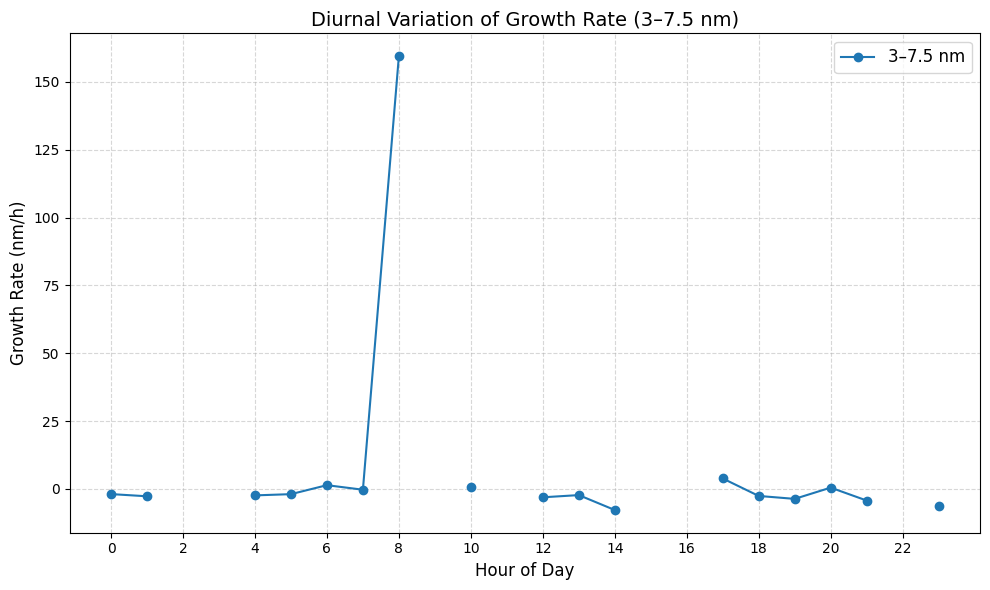

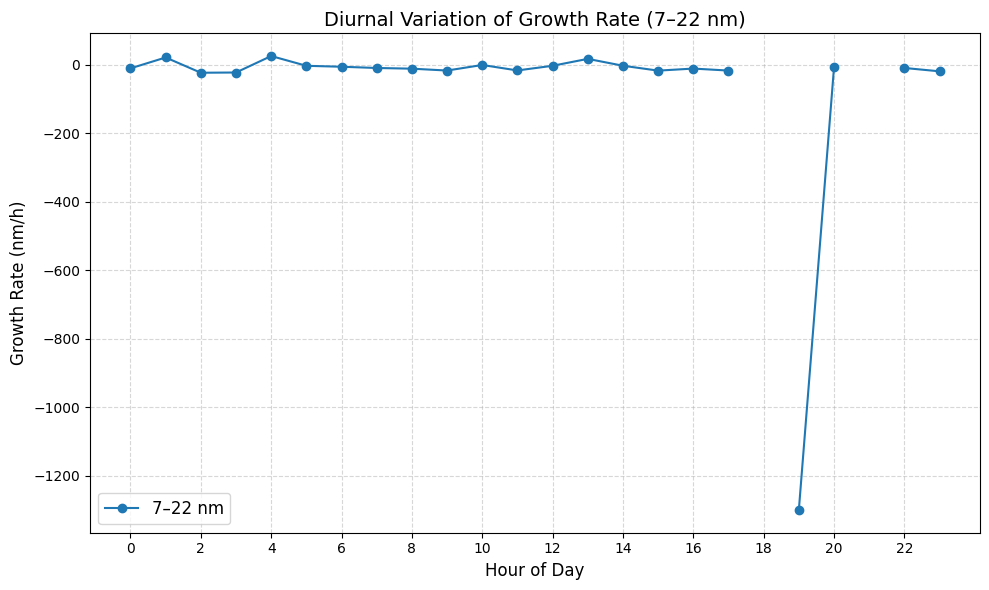

In [56]:
# Function to calculate hourly growth rates for diurnal variation
def calculate_diurnal_variation(particles, diameter_min, diameter_max):
    """
    Calculate hourly growth rates for diurnal variation.
    """
    hourly_gr = []
    for hour in range(24):  # Loop through all 24 hours
        # Filter particles for the current hour
        hourly_particles = particles.sel(time=particles['time'].dt.hour == hour)
        
        # Calculate GR for the specified diameter range
        gr = calculate_growth_rate_refined(hourly_particles, diameter_min, diameter_max)
        hourly_gr.append(gr)
    return hourly_gr

# Calculate diurnal variations for group2 using the refined method
diurnal_gr_3_7_5 = calculate_diurnal_variation(group2, 3e-9, 7.5e-9)
diurnal_gr_7_22 = calculate_diurnal_variation(group2, 7e-9, 22e-9)

# Plot the diurnal variations
hours = list(range(24))

# Plot for 3–7.5 nm
plt.figure(figsize=(10, 6))
plt.plot(hours, diurnal_gr_3_7_5, marker='o', label='3–7.5 nm')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Growth Rate (nm/h)', fontsize=12)
plt.title('Diurnal Variation of Growth Rate (3–7.5 nm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24, 2))
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot for 7–22 nm
plt.figure(figsize=(10, 6))
plt.plot(hours, diurnal_gr_7_22, marker='o', label='7–22 nm')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Growth Rate (nm/h)', fontsize=12)
plt.title('Diurnal Variation of Growth Rate (7–22 nm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24, 2))
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


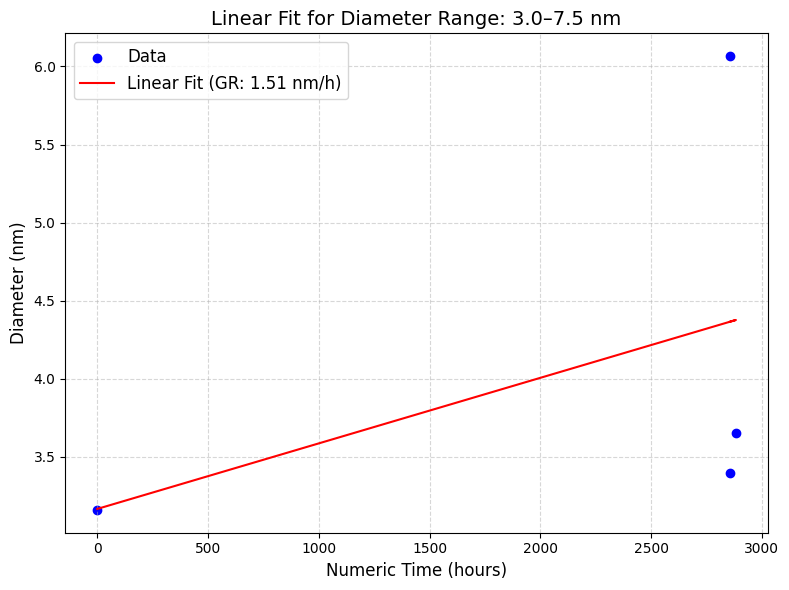

Recalculated GR for group2 (3–7.5 nm) with debugging: 1.5108348140007466 nm/h


In [53]:
# Debugging function to inspect `gr_data` and plot the linear fit
def calculate_and_debug_growth_rate(particles, diameter_min, diameter_max):
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        concentrations = filtered_particles[:, size_idx]
        if concentrations.isnull().all() or concentrations.std() == 0:
            results.append((diameter.values, np.nan))
            continue

        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})
        df = df[df['concentration'] > 0]

        if not df.empty and df['concentration'].max() > 0:
            peak_idx = df['concentration'].idxmax()
            peak_time = df['time'][peak_idx]
            results.append((diameter.values, peak_time))
        else:
            results.append((diameter.values, np.nan))

    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()
    gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])
    gr_data = gr_data.drop_duplicates(subset=['Peak_Time'])

    try:
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')

        if gr_data['Numeric_Time'].std() == 0:
            raise ValueError("No variation in peak times across diameters.")

        slope, _ = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)

        # Plot the linear fit for debugging
        plt.figure(figsize=(8, 6))
        plt.scatter(gr_data['Numeric_Time'], gr_data['Diameter'] * 1e9, label='Data', color='blue')
        plt.plot(gr_data['Numeric_Time'], (slope * gr_data['Numeric_Time'] + _) * 1e9,
                 label=f'Linear Fit (GR: {slope * 1e9 * 3600:.2f} nm/h)', color='red')
        plt.xlabel('Numeric Time (hours)', fontsize=12)
        plt.ylabel('Diameter (nm)', fontsize=12)
        plt.title(f'Linear Fit for Diameter Range: {diameter_min * 1e9:.1f}–{diameter_max * 1e9:.1f} nm', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

        return slope * 1e9 * 3600  # Convert to nm/h
    except Exception as e:
        print(f"Linear fit failed: {e}")
        print("Debugging `gr_data`:")
        print(gr_data)
        return None


# Debug group2 (3–7.5 nm) GR
g2_gr_3_7_5_debug = calculate_and_debug_growth_rate(group2, 3e-9, 7.5e-9)
print(f"Recalculated GR for group2 (3–7.5 nm) with debugging: {g2_gr_3_7_5_debug} nm/h")


In [54]:
# Function to compare GR outputs for raw and smoothed data
def calculate_raw_vs_smoothed_growth_rate(particles, diameter_min, diameter_max):
    """
    Calculate growth rates for raw and smoothed data for comparison.
    """
    # Raw data calculation
    raw_gr = calculate_growth_rate_refined(particles, diameter_min, diameter_max)
    
    # Smoothed data calculation (apply rolling mean)
    smoothed_particles = particles.rolling(time=3, center=True).mean()
    smoothed_gr = calculate_growth_rate_refined(smoothed_particles, diameter_min, diameter_max)
    
    return raw_gr, smoothed_gr

# Compare raw and smoothed GR outputs for group2 and 3–7.5 nm
g2_gr_3_7_5_raw, g2_gr_3_7_5_smoothed = calculate_raw_vs_smoothed_growth_rate(group2, 3e-9, 7.5e-9)

# Compare raw and smoothed GR outputs for group2 and 7–22 nm
g2_gr_7_22_raw, g2_gr_7_22_smoothed = calculate_raw_vs_smoothed_growth_rate(group2, 7e-9, 22e-9)

# Display the results
print(f"Group 2 (3–7.5 nm): Raw GR = {g2_gr_3_7_5_raw} nm/h, Smoothed GR = {g2_gr_3_7_5_smoothed} nm/h")
print(f"Group 2 (7–22 nm): Raw GR = {g2_gr_7_22_raw} nm/h, Smoothed GR = {g2_gr_7_22_smoothed} nm/h")


Group 2 (3–7.5 nm): Raw GR = 1.5108348140007466 nm/h, Smoothed GR = 74.04873149999985 nm/h
Group 2 (7–22 nm): Raw GR = -3.6958359034454724 nm/h, Smoothed GR = -7.120670646422274 nm/h


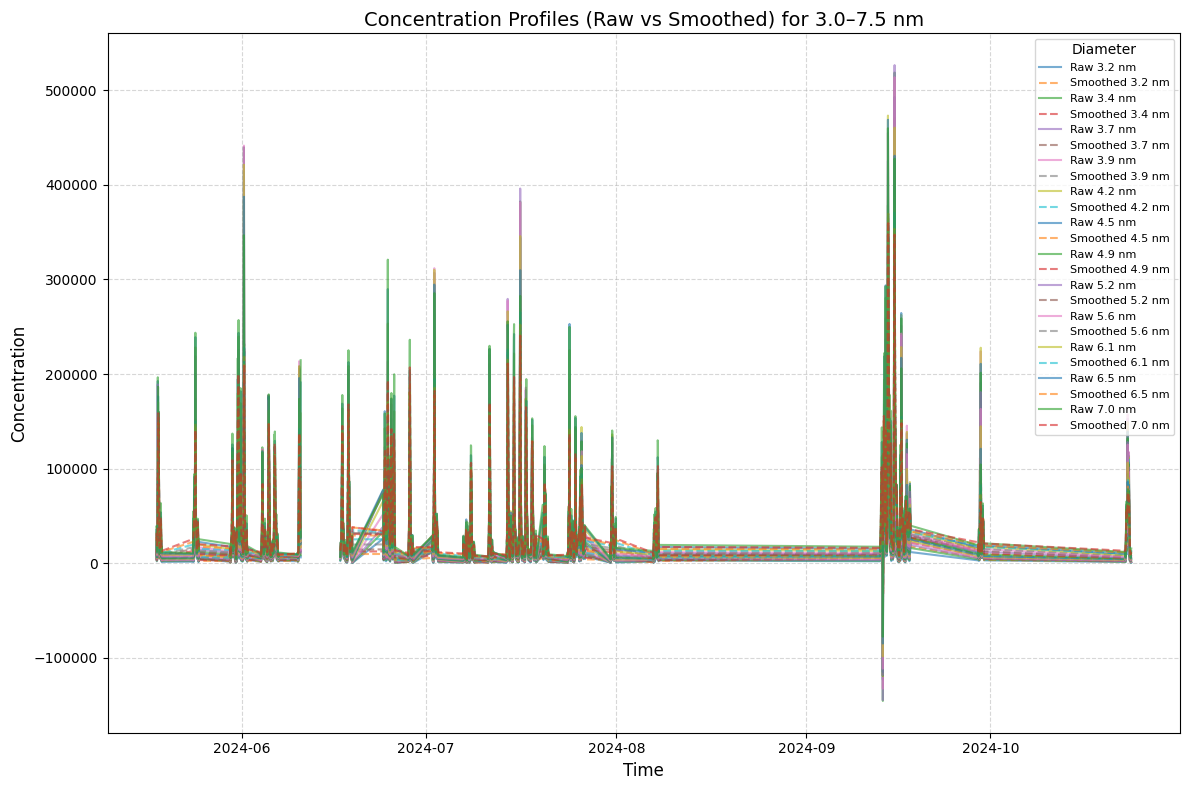

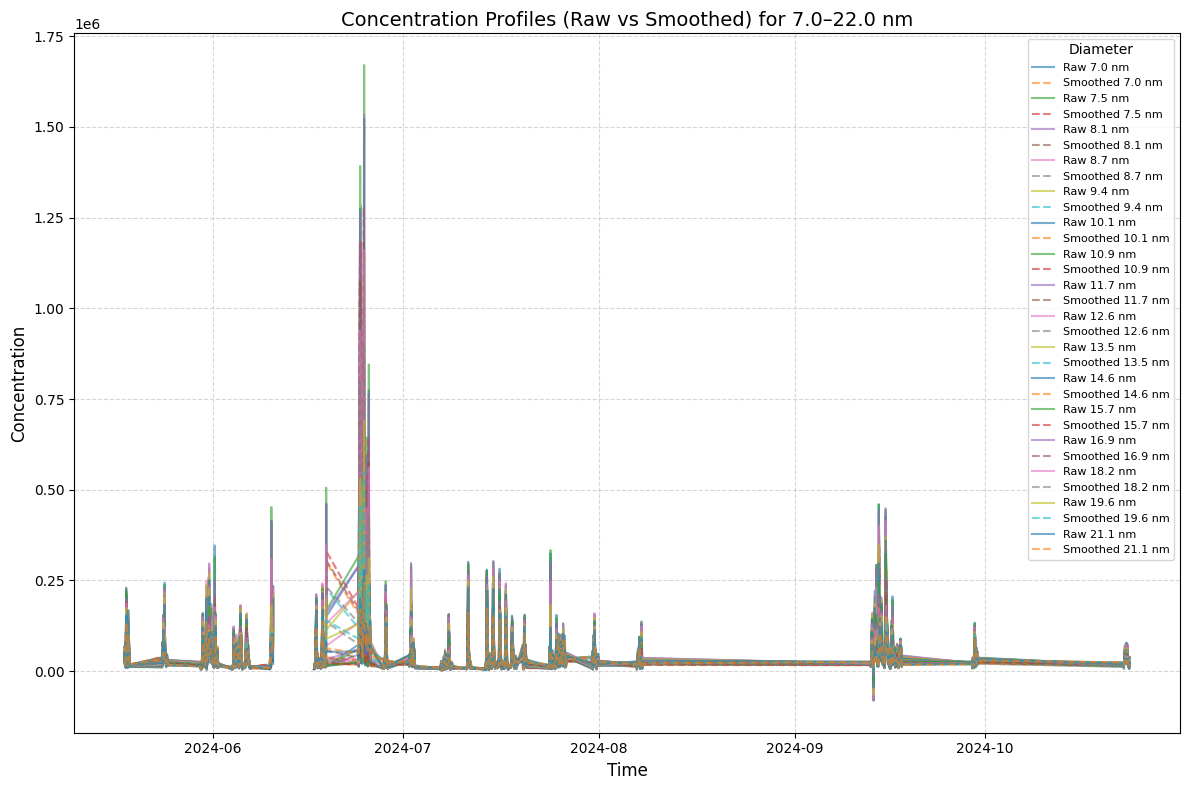

In [55]:
# Visualize concentration profiles for raw vs smoothed data
def plot_raw_vs_smoothed_profiles(particles, smoothed_particles, diameter_min, diameter_max):
    # Filter diameters within the specified range
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    
    raw_filtered = particles.sel(diameter=filtered_diameters)
    smoothed_filtered = smoothed_particles.sel(diameter=filtered_diameters)

    # Plot raw and smoothed concentration profiles
    plt.figure(figsize=(12, 8))
    for size_idx, diameter in enumerate(filtered_diameters):
        plt.plot(raw_filtered['time'], raw_filtered[:, size_idx], label=f"Raw {diameter.values*1e9:.1f} nm", alpha=0.6)
        plt.plot(smoothed_filtered['time'], smoothed_filtered[:, size_idx], '--', label=f"Smoothed {diameter.values*1e9:.1f} nm", alpha=0.6)

    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Concentration', fontsize=12)
    plt.title(f'Concentration Profiles (Raw vs Smoothed) for {diameter_min*1e9:.1f}–{diameter_max*1e9:.1f} nm', fontsize=14)
    plt.legend(fontsize=8, title="Diameter", loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot the concentration profiles for group2 and 3–7.5 nm
plot_raw_vs_smoothed_profiles(group2, group2.rolling(time=3, center=True).mean(), 3e-9, 7.5e-9)

# Plot the concentration profiles for group2 and 7–22 nm
plot_raw_vs_smoothed_profiles(group2, group2.rolling(time=3, center=True).mean(), 7e-9, 22e-9)


In [10]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Define Gaussian function for fitting
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Function to calculate GR for a given diameter range
def calculate_growth_rate(particles, diameter_min, diameter_max):
    # Filter diameters within the specified range
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    # Gaussian fitting to find peak times for each size channel
    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]
        
        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})
        
        # Fit a Gaussian to the data
        try:
            popt, _ = curve_fit(
                gaussian,
                np.arange(len(df['time'])),  # Use numerical indices for fitting
                df['concentration'].fillna(0),  # Replace NaNs with 0 for fitting
                p0=[df['concentration'].max(), len(df['time']) // 2, 1]
            )
            a, peak_time_idx, sigma = popt
            peak_time = particles['time'][int(peak_time_idx)].values  # Map index to actual time
            results.append((diameter.values, peak_time))
        except:
            # Append NaN if fitting fails
            results.append((diameter.values, np.nan))

    # Convert results to DataFrame for further processing
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    # Perform linear fit (time vs diameter) to calculate the growth rate (GR)
    try:
        # Ensure proper datetime conversion for Peak_Time
        gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])

        # Convert time to numeric (e.g., hours since start) for linear fitting
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours

        # Convert Diameter to float for proper linear fitting
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')
        gr_data['Numeric_Time'] = gr_data['Numeric_Time'].astype('float64')

        # Perform linear fit
        slope, intercept = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        growth_rate_nm_h = slope * 1e9 * 3600  # Convert m/s to nm/h
    except Exception as e:
        growth_rate_nm_h = None
        print(f"An error occurred: {e}")

    return growth_rate_nm_h

# Function to filter particles by event days
def filter_by_days(particles, days):
    # Convert particle time dimension to date-only format for comparison
    particle_dates = pd.to_datetime(particles['time'].values).date
    event_dates = set(days.date)  # Convert event days to date-only format
    mask = np.array([date in event_dates for date in particle_dates])
    return particles.sel(time=mask)

# Define the groups of days
g1_days = pd.to_datetime([
    '2024-05-17', '2024-05-19', '2024-05-20', '2024-05-25', '2024-05-28',
    '2024-05-30', '2024-06-11', '2024-06-13', '2024-06-15', '2024-06-17',
    '2024-06-18', '2024-06-21', '2024-06-23', '2024-06-27', '2024-06-29',
    '2024-06-30', '2024-07-02', '2024-07-07', '2024-07-11', '2024-07-14',
    '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18', '2024-07-21',
    '2024-07-30', '2024-08-02', '2024-08-03', '2024-08-09', '2024-08-11',
    '2024-08-13', '2024-08-16', '2024-08-21', '2024-08-22', '2024-08-23',
    '2024-08-31', '2024-09-08', '2024-09-11', '2024-09-21', '2024-09-22',
    '2024-09-23', '2024-09-27'
])

g2_days = pd.to_datetime([
    '2024-05-18', '2024-05-24', '2024-05-30', '2024-05-31', '2024-06-01',
    '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-10', '2024-06-17',
    '2024-06-18', '2024-06-24', '2024-06-25', '2024-06-28', '2024-07-02',
    '2024-07-07', '2024-07-08', '2024-07-11', '2024-07-14', '2024-07-15',
    '2024-07-16', '2024-07-17', '2024-07-18', '2024-07-20', '2024-07-24',
    '2024-07-25', '2024-07-26', '2024-07-31', '2024-08-07', '2024-09-13',
    '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17', '2024-09-29',
    '2024-10-23'
])

g3_days = pd.to_datetime([
    '2024-05-21', '2024-05-23', '2024-05-26', '2024-05-27', '2024-05-30',
    '2024-06-02', '2024-06-07', '2024-06-09', '2024-06-12', '2024-06-14',
    '2024-06-16', '2024-06-19', '2024-06-22', '2024-06-24', '2024-06-26',
    '2024-06-27', '2024-07-01', '2024-07-03', '2024-07-04', '2024-07-05',
    '2024-07-06', '2024-07-09', '2024-07-10', '2024-07-12', '2024-07-13',
    '2024-07-17', '2024-07-18', '2024-07-19', '2024-07-20', '2024-07-23',
    '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28',
    '2024-07-31', '2024-08-01', '2024-08-04', '2024-08-05', '2024-08-06',
    '2024-08-07', '2024-08-08', '2024-08-10', '2024-08-12', '2024-08-14',
    '2024-08-15', '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-21',
    '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29',
    '2024-08-30', '2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04',
    '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-09', '2024-09-10',
    '2024-09-12', '2024-09-13', '2024-09-24', '2024-09-25', '2024-09-26',
    '2024-09-27', '2024-09-28', '2024-09-30', '2024-10-01', '2024-10-02',
    '2024-10-03', '2024-10-05', '2024-10-06', '2024-10-07', '2024-10-10',
    '2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-17',
    '2024-10-19', '2024-10-21', '2024-10-23', '2024-10-25', '2024-10-26'
])

In [12]:
# Reattempt GR calculation for each group
results = {}
for category, days in zip(['g1', 'g2', 'g3'], [g1_days, g2_days, g3_days]):
    # Filter particles for the current category
    filtered_particles = filter_by_days(particles, days)
    
    # Calculate GR for each diameter range
    gr_3_7_5 = calculate_growth_rate(filtered_particles, 3e-9, 7.5e-9)
    gr_7_22 = calculate_growth_rate(filtered_particles, 7e-9, 22e-9)
    
    # Store results
    results[category] = {
        'GR (3–7.5 nm)': gr_3_7_5,
        'GR (7–22 nm)': gr_7_22
    }

# Display the results
for category, gr_values in results.items():
    print(f"Category: {category}")
    for range_name, gr in gr_values.items():
        print(f"  {range_name}: {gr} nm/h")


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


An error occurred: SVD did not converge in Linear Least Squares
 ** On entry to DLASCL parameter number  4 had an illegal value
Category: g1
  GR (3–7.5 nm): 66.74617945966884 nm/h
  GR (7–22 nm): -62.587368315105515 nm/h
Category: g2
  GR (3–7.5 nm): None nm/h
  GR (7–22 nm): 40.291307250205655 nm/h
Category: g3
  GR (3–7.5 nm): 9.932824701984506 nm/h
  GR (7–22 nm): 18.595715628264905 nm/h


In [13]:
def calculate_growth_rate_with_fallback(particles, diameter_min, diameter_max):
    # Filter diameters within the specified range
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    # Gaussian fitting to find peak times for each size channel
    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]
        
        # Check if data has sufficient variance
        if concentrations.isnull().all() or concentrations.std() == 0:
            results.append((diameter.values, np.nan))  # Skip if no variance
            continue

        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})

        # Fit a Gaussian to the data
        try:
            popt, _ = curve_fit(
                gaussian,
                np.arange(len(df['time'])),  # Use numerical indices for fitting
                df['concentration'].fillna(0),  # Replace NaNs with 0 for fitting
                p0=[df['concentration'].max(), len(df['time']) // 2, 1]
            )
            a, peak_time_idx, sigma = popt
            peak_time = particles['time'][int(peak_time_idx)].values  # Map index to actual time
            results.append((diameter.values, peak_time))
        except Exception as e:
            # Append NaN if fitting fails
            print(f"Gaussian fitting failed for diameter {diameter.values}: {e}")
            results.append((diameter.values, np.nan))

    # Convert results to DataFrame for further processing
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    # Perform linear fit (time vs diameter) to calculate the growth rate (GR)
    try:
        # Ensure proper datetime conversion for Peak_Time
        gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])

        # Convert time to numeric (e.g., hours since start) for linear fitting
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours

        # Convert Diameter to float for proper linear fitting
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')
        gr_data['Numeric_Time'] = gr_data['Numeric_Time'].astype('float64')

        # Perform linear fit
        slope, intercept = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        growth_rate_nm_h = slope * 1e9 * 3600  # Convert m/s to nm/h
    except Exception as e:
        growth_rate_nm_h = None
        print(f"Linear fit failed: {e}")

    return growth_rate_nm_h

# Retry for g2 days for 3–7.5 nm with fallback
filtered_g2_particles = filter_by_days(particles, g2_days)
g2_gr_3_7_5 = calculate_growth_rate_with_fallback(filtered_g2_particles, 3e-9, 7.5e-9)
print(f"Recalculated GR for g2 (3–7.5 nm): {g2_gr_3_7_5} nm/h")


Gaussian fitting failed for diameter 3.39569827e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Gaussian fitting failed for diameter 3.65377117e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Gaussian fitting failed for diameter 3.93145759e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Gaussian fitting failed for diameter 4.22385724e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Gaussian fitting failed for diameter 4.53800393e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Gaussian fitting failed for diameter 4.87892846e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Gaussian fitting failed for diameter 5.24546548e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Gaussian fitting failed for diameter 5.64

/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


 ** On entry to DLASCL parameter number  4 had an illegal value


In [14]:
def calculate_growth_rate_with_debug(particles, diameter_min, diameter_max):
    # Filter diameters within the specified range
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]

        # Check if data has sufficient variance
        if concentrations.isnull().all() or concentrations.std() == 0:
            results.append((diameter.values, np.nan))  # Skip if no variance
            continue

        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})

        # Smooth the data
        df['concentration'] = df['concentration'].rolling(window=3, center=True).mean()

        # Fit a Gaussian to the data
        try:
            popt, _ = curve_fit(
                gaussian,
                np.arange(len(df['time'])),
                df['concentration'].fillna(0),
                p0=[df['concentration'].max(), len(df['time']) // 2, 1],
                maxfev=5000  # Increase max function evaluations
            )
            a, peak_time_idx, sigma = popt
            peak_time = particles['time'][int(peak_time_idx)].values  # Map index to actual time
            results.append((diameter.values, peak_time))
        except Exception as e:
            print(f"Gaussian fitting failed for diameter {diameter.values}: {e}")
            results.append((diameter.values, np.nan))

    # Convert results to DataFrame for further processing
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    # Perform linear fit (time vs diameter) to calculate the growth rate (GR)
    try:
        # Ensure proper datetime conversion for Peak_Time
        gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])

        # Convert time to numeric (e.g., hours since start) for linear fitting
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours

        # Convert Diameter to float for proper linear fitting
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')
        gr_data['Numeric_Time'] = gr_data['Numeric_Time'].astype('float64')

        # Perform linear fit
        slope, intercept = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        growth_rate_nm_h = slope * 1e9 * 3600  # Convert m/s to nm/h
    except Exception as e:
        growth_rate_nm_h = None
        print(f"Linear fit failed: {e}")

    return growth_rate_nm_h

# Retry for g2 days for 3–7.5 nm
filtered_g2_particles = filter_by_days(particles, g2_days)
g2_gr_3_7_5_debug = calculate_growth_rate_with_debug(filtered_g2_particles, 3e-9, 7.5e-9)
print(f"Recalculated GR for g2 (3–7.5 nm) with debug: {g2_gr_3_7_5_debug} nm/h")


Gaussian fitting failed for diameter 3.16011296e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.
Gaussian fitting failed for diameter 3.39569827e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.
Gaussian fitting failed for diameter 3.65377117e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.
Gaussian fitting failed for diameter 3.93145759e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.
Gaussian fitting failed for diameter 4.22385724e-09: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.
Gaussian fitting failed for diameter 4.53800393e-09: index 79570 is out of bounds for axis 0 with size 864
Gaussian fitting failed for diameter 4.87892846e-09: index 72811 is out of bounds for axis 0 with size 864
Gaussian fitting failed for diameter 5.24546548e-09: index 68100 is out of bounds for axis 0 wit

In [18]:
def calculate_growth_rate_with_fallback(particles, diameter_min, diameter_max):
    # Filter diameters within the specified range
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]

        # Check if data has sufficient variance
        if concentrations.isnull().all() or concentrations.std() == 0:
            results.append((diameter.values, np.nan))  # Skip if no variance
            continue

        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})

        # Smooth the data
        df['concentration'] = df['concentration'].rolling(window=3, center=True).mean()

        # Fit a Gaussian to the data
        try:
            popt, _ = curve_fit(
                gaussian,
                np.arange(len(df['time'])),
                df['concentration'].fillna(0),
                p0=[df['concentration'].max(), len(df['time']) // 2, 1],
                bounds=([0, 0, 0], [np.inf, len(df['time']), np.inf]),  # Add bounds
                maxfev=5000  # Increase max function evaluations
            )
            a, peak_time_idx, sigma = popt
            if 0 <= peak_time_idx < len(df['time']):  # Ensure peak_time_idx is within bounds
                peak_time = particles['time'][int(peak_time_idx)].values
                results.append((diameter.values, peak_time))
            else:
                results.append((diameter.values, np.nan))
        except Exception as e:
            print(f"Gaussian fitting failed for diameter {diameter.values}: {e}")
            # Fallback: Use maximum concentration directly
            if df['concentration'].max() > 0:
                peak_idx = df['concentration'].idxmax()
                peak_time = df['time'][peak_idx]
                results.append((diameter.values, peak_time))
            else:
                results.append((diameter.values, np.nan))

    # Convert results to DataFrame for further processing
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    # Perform linear fit (time vs diameter) to calculate the growth rate (GR)
    try:
        # Ensure proper datetime conversion for Peak_Time
        gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])

        # Convert time to numeric (e.g., hours since start) for linear fitting
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours

        # Convert Diameter to float for proper linear fitting
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')
        gr_data['Numeric_Time'] = gr_data['Numeric_Time'].astype('float64')

        # Perform linear fit
        slope, intercept = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        growth_rate_nm_h = slope * 1e9 * 3600  # Convert m/s to nm/h
    except Exception as e:
        growth_rate_nm_h = None
        print(f"Linear fit failed: {e}")

    return growth_rate_nm_h

# Reattempt GR calculation for each group
results = {}
for category, days in zip(['g1', 'g2', 'g3'], [g1_days, g2_days, g3_days]):
    # Filter particles for the current category
    filtered_particles = filter_by_days(particles, days)
    
    # Calculate GR for each diameter range
    gr_3_7_5 = calculate_growth_rate_with_fallback(filtered_particles, 3e-9, 7.5e-9)
    gr_7_22 = calculate_growth_rate_with_fallback(filtered_particles, 7e-9, 22e-9)
    
    # Store results
    results[category] = {
        'GR (3–7.5 nm)': gr_3_7_5,
        'GR (7–22 nm)': gr_7_22
    }

# Display the results
for category, gr_values in results.items():
    print(f"Category: {category}")
    for range_name, gr in gr_values.items():
        print(f"  {range_name}: {gr} nm/h")



Gaussian fitting failed for diameter 1.35414036e-08: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 3.39569827e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Category: g1
  GR (3–7.5 nm): 67.21953962071728 nm/h
  GR (7–22 nm): -44.54334794246083 nm/h
Category: g2
  GR (3–7.5 nm): 6.029273788356752 nm/h
  GR (7–22 nm): -8.254814584317419 nm/h
Category: g3
  GR (3–7.5 nm): 1.0131436036266137 nm/h
  GR (7–22 nm): -13.913351300361848 nm/h


In [ ]:
def calculate_growth_rate_with_fallback(particles, diameter_min, diameter_max):
    # Filter diameters within the specified range
    diameter_range = (particles['diameter'] >= diameter_min) & (particles['diameter'] <= diameter_max)
    filtered_diameters = particles['diameter'].where(diameter_range, drop=True)
    filtered_particles = particles.sel(diameter=filtered_diameters)

    results = []
    for size_idx, diameter in enumerate(filtered_diameters):
        # Extract concentration over time for this size channel
        concentrations = filtered_particles[:, size_idx]

        # Check if data has sufficient variance
        if concentrations.isnull().all() or concentrations.std() == 0:
            results.append((diameter.values, np.nan))  # Skip if no variance
            continue

        # Convert to Pandas DataFrame for easier handling
        df = pd.DataFrame({'time': particles['time'].values, 'concentration': concentrations.values})

        # Smooth the data
        df['concentration'] = df['concentration'].rolling(window=3, center=True).mean()

        # Fit a Gaussian to the data
        try:
            popt, _ = curve_fit(
                gaussian,
                np.arange(len(df['time'])),
                df['concentration'].fillna(0),
                p0=[df['concentration'].max(), len(df['time']) // 2, 1],
                bounds=([0, 0, 0], [np.inf, len(df['time']), np.inf]),  # Add bounds
                maxfev=5000  # Increase max function evaluations
            )
            a, peak_time_idx, sigma = popt
            if 0 <= peak_time_idx < len(df['time']):  # Ensure peak_time_idx is within bounds
                peak_time = particles['time'][int(peak_time_idx)].values
                results.append((diameter.values, peak_time))
            else:
                results.append((diameter.values, np.nan))
        except Exception as e:
            print(f"Gaussian fitting failed for diameter {diameter.values}: {e}")
            # Fallback: Use maximum concentration directly
            if df['concentration'].max() > 0:
                peak_idx = df['concentration'].idxmax()
                peak_time = df['time'][peak_idx]
                results.append((diameter.values, peak_time))
            else:
                results.append((diameter.values, np.nan))

    # Convert results to DataFrame for further processing
    gr_data = pd.DataFrame(results, columns=['Diameter', 'Peak_Time']).dropna()

    # Perform linear fit (time vs diameter) to calculate the growth rate (GR)
    try:
        # Ensure proper datetime conversion for Peak_Time
        gr_data['Peak_Time'] = pd.to_datetime(gr_data['Peak_Time'])

        # Convert time to numeric (e.g., hours since start) for linear fitting
        gr_data['Numeric_Time'] = (
            gr_data['Peak_Time'] - gr_data['Peak_Time'].min()
        ).dt.total_seconds() / 3600  # Convert to hours

        # Convert Diameter to float for proper linear fitting
        gr_data['Diameter'] = gr_data['Diameter'].astype('float64')
        gr_data['Numeric_Time'] = gr_data['Numeric_Time'].astype('float64')

        # Perform linear fit
        slope, intercept = np.polyfit(gr_data['Numeric_Time'], gr_data['Diameter'], 1)
        growth_rate_nm_h = slope * 1e9 * 3600  # Convert m/s to nm/h
    except Exception as e:
        growth_rate_nm_h = None
        print(f"Linear fit failed: {e}")

    return growth_rate_nm_h

# Retry for g2 days for 3–7.5 nm
filtered_g2_particles = filter_by_days(particles, g2_days)
g2_gr_3_7_5_fallback = calculate_growth_rate_with_fallback(filtered_g2_particles, 3e-9, 7.5e-9)
print(f"Recalculated GR for g2 (3–7.5 nm) with fallback: {g2_gr_3_7_5_fallback} nm/h")


Gaussian fitting failed for diameter 3.39569827e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Recalculated GR for g2 (3–7.5 nm) with fallback: 6.029273788356752 nm/h


Gaussian fitting failed for diameter 7.01103164e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
Gaussian fitting failed for diameter 7.01103164e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 6.52192045e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 7.01103164e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 5.24546548e-09: Optimal parameters not found: The maximum number of function evaluations is exceed

/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
Gaussian fitting failed for diameter 4.53800393e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 4.87892846e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 5.24546548e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 6.52192045e-09: Optimal parameters not found: The maximum number of function evaluations is exceed

/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
Gaussian fitting failed for diameter 6.52192045e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.


/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
Gaussian fitting failed for diameter 3.93145759e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 5.24546548e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 4.53800393e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 5.64126564e-09: Optimal parameters not found: The maximum number of function evaluations is exceed

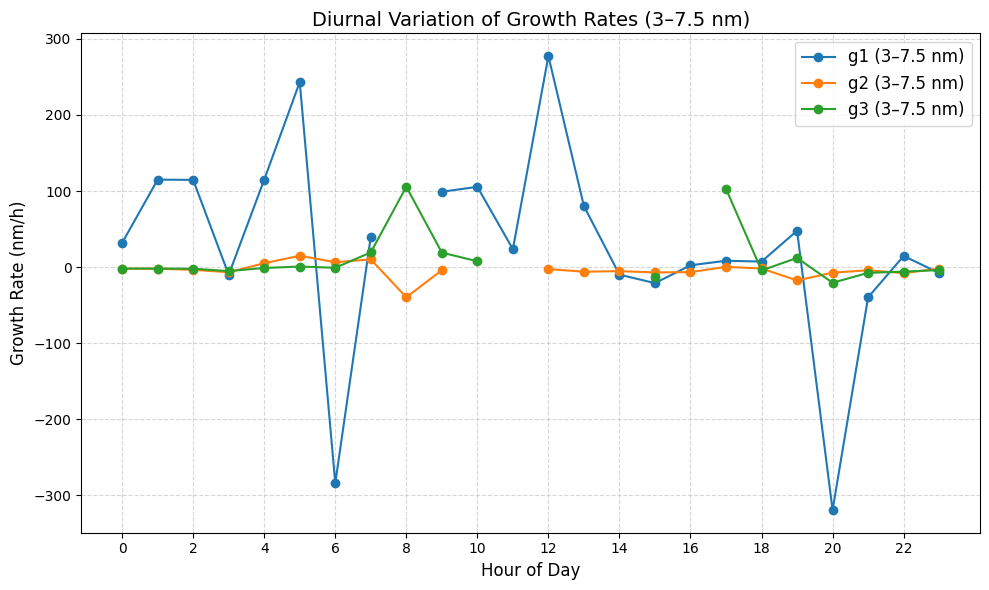

In [19]:
import matplotlib.pyplot as plt

def calculate_hourly_gr(particles, days, diameter_min, diameter_max):
    """
    Calculate hourly growth rates for a given group and diameter range.
    """
    hourly_gr = []
    for hour in range(24):  # Loop through all 24 hours
        # Filter particles for the current hour and group days
        filtered_particles = particles.sel(
            time=particles['time'].dt.hour == hour
        )
        filtered_particles = filter_by_days(filtered_particles, days)
        
        # Calculate GR for the specified diameter range
        gr = calculate_growth_rate_with_fallback(filtered_particles, diameter_min, diameter_max)
        hourly_gr.append(gr)
    return hourly_gr

# Calculate hourly GR for each group and diameter range
g1_hourly_gr_3_7_5 = calculate_hourly_gr(particles, g1_days, 3e-9, 7.5e-9)
g2_hourly_gr_3_7_5 = calculate_hourly_gr(particles, g2_days, 3e-9, 7.5e-9)
g3_hourly_gr_3_7_5 = calculate_hourly_gr(particles, g3_days, 3e-9, 7.5e-9)

# Plot the diurnal variation
plt.figure(figsize=(10, 6))
hours = list(range(24))

plt.plot(hours, g1_hourly_gr_3_7_5, label='g1 (3–7.5 nm)', marker='o')
plt.plot(hours, g2_hourly_gr_3_7_5, label='g2 (3–7.5 nm)', marker='o')
plt.plot(hours, g3_hourly_gr_3_7_5, label='g3 (3–7.5 nm)', marker='o')

plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Growth Rate (nm/h)', fontsize=12)
plt.title('Diurnal Variation of Growth Rates (3–7.5 nm)', fontsize=14)
plt.xticks(range(0, 24, 2))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


Gaussian fitting failed for diameter 9.38811851e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 1.00955239e-08: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 1.08562331e-08: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 1.35414036e-08: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 1.6873409e-08: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 1.81717471e-08: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 1.9569987e-08: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for d

/home/coliewo/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


Linear fit failed: SVD did not converge in Linear Least Squares ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value

Gaussian fitting failed for diameter 7.01103164e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 7.01103164e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 7.54292682e-09: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Gaussian fitting failed for diameter 8.11517448e-09: Optimal parameters not found: The maximum number of function evaluations is exceed

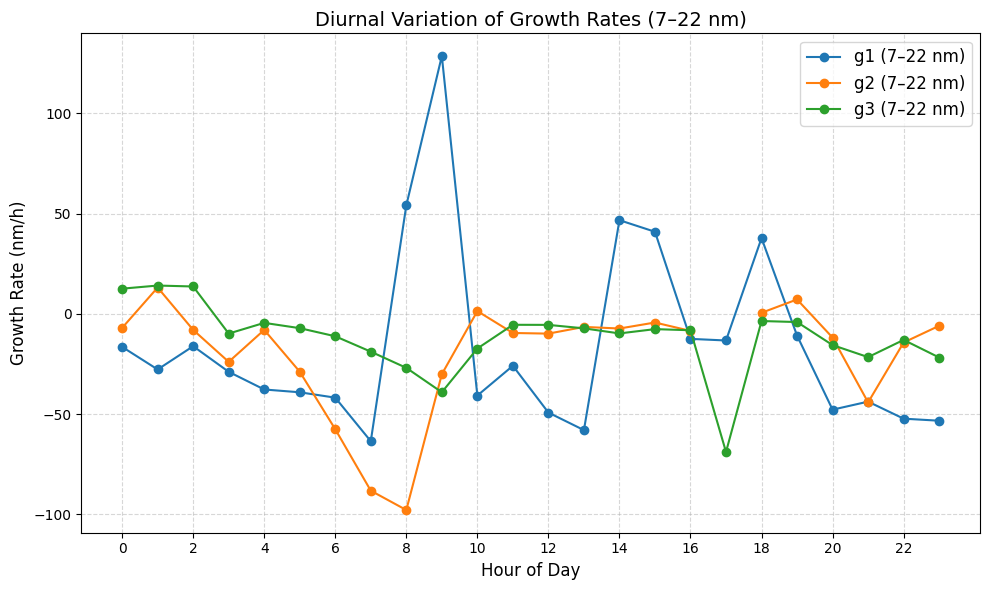

In [20]:
# Calculate hourly GR for each group and diameter range (7–22 nm)

g1_hourly_gr_7_22 = calculate_hourly_gr(particles, g1_days, 7e-9, 22e-9)
g2_hourly_gr_7_22 = calculate_hourly_gr(particles, g2_days, 7e-9, 22e-9)
g3_hourly_gr_7_22 = calculate_hourly_gr(particles, g3_days, 7e-9, 22e-9)

hours = list(range(24))

# Plot the diurnal variation for 7–22 nm
plt.figure(figsize=(10, 6))

plt.plot(hours, g1_hourly_gr_7_22, label='g1 (7–22 nm)', marker='o')
plt.plot(hours, g2_hourly_gr_7_22, label='g2 (7–22 nm)', marker='o')
plt.plot(hours, g3_hourly_gr_7_22, label='g3 (7–22 nm)', marker='o')

plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Growth Rate (nm/h)', fontsize=12)
plt.title('Diurnal Variation of Growth Rates (7–22 nm)', fontsize=14)
plt.xticks(range(0, 24, 2))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [31]:
particles

<xarray.DataArray (time: 3986, diameter: 55)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [           nan,            nan,            nan, ...,
        23576.20967629, 22110.026076  , 20655.16787305],
       [           nan,            nan,            nan, ...,
        23965.68913229, 22536.79643374, 20874.32127375],
       [           nan,            nan,            nan, ...,
        21821.65161921, 23090.50927438, 23048.36417026]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-10-30

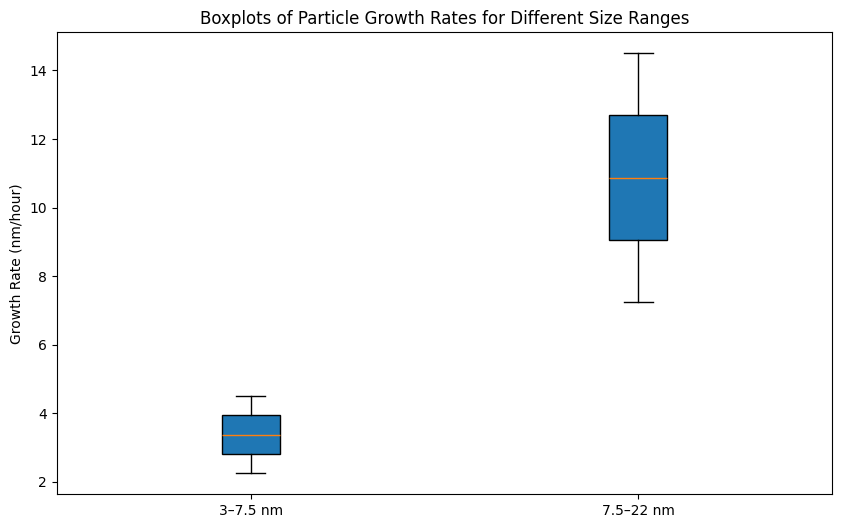

Mean growth rate for 3–7.5 nm: 3.37 nm/hour
Mean growth rate for 7.5–22 nm: 10.88 nm/hour


In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Extract relevant particles
diameter = particles["diameter"]
time = particles["time"]

# Define size bins
size_bin_edges = [3e-9, 7.5e-9, 22e-9]  # Size bin edges in meters
time_resolution_hours = 1  # Dataset is hourly

# Function to extract particles for a specific size bin
def extract_size_bin_data(particles, diameter, size_bin):
    mask = (diameter >= size_bin[0]) & (diameter <= size_bin[1])
    return particles[:, mask].mean(dim="diameter")

# Extract particles for each size bin
size_bin_data = {
    f"{low*1e9:.1f}-{high*1e9:.1f} nm": extract_size_bin_data(
        particles, diameter, (low, high)
    ).values
    for low, high in zip(size_bin_edges[:-1], size_bin_edges[1:])
}

# Time array (numeric)
time_numeric = np.arange(len(time))

# Function to fit Gaussian
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

# Smooth the particles and identify peaks
growth_rates_3_7_5 = []
growth_rates_7_5_22 = []

for (bin_name_1, concentration_1), (bin_name_2, concentration_2) in zip(
    size_bin_data.items(), list(size_bin_data.items())[1:]
):
    # Smooth particles using a moving average
    window_size = 5
    concentration_1_smoothed = np.convolve(
        concentration_1, np.ones(window_size) / window_size, mode="valid"
    )
    concentration_2_smoothed = np.convolve(
        concentration_2, np.ones(window_size) / window_size, mode="valid"
    )
    
    # Identify peaks
    peaks_1, _ = find_peaks(concentration_1_smoothed)
    peaks_2, _ = find_peaks(concentration_2_smoothed)
    
    # Calculate growth rates
    for p1, p2 in zip(peaks_1, peaks_2):
        delta_t = (p2 - p1) * time_resolution_hours
        if delta_t > 0:  # Valid growth scenario
            if bin_name_1 == "3.0-7.5 nm":
                delta_size = size_bin_edges[1] - size_bin_edges[0]
                growth_rates_3_7_5.append(delta_size / delta_t * 1e9)  # Convert to nm/hour
            if bin_name_2 == "7.5-22.0 nm":
                delta_size = size_bin_edges[2] - size_bin_edges[1]
                growth_rates_7_5_22.append(delta_size / delta_t * 1e9)  # Convert to nm/hour

# Calculate mean growth rates
mean_gr_3_7_5 = np.mean(growth_rates_3_7_5)
mean_gr_7_5_22 = np.mean(growth_rates_7_5_22)

# Plot the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(
    [growth_rates_3_7_5, growth_rates_7_5_22],
    labels=["3–7.5 nm", "7.5–22 nm"],
    patch_artist=True,
)
plt.ylabel("Growth Rate (nm/hour)")
plt.title("Boxplots of Particle Growth Rates for Different Size Ranges")
plt.show()

# Print the mean growth rates
print(f"Mean growth rate for 3–7.5 nm: {mean_gr_3_7_5:.2f} nm/hour")
print(f"Mean growth rate for 7.5–22 nm: {mean_gr_7_5_22:.2f} nm/hour")


In [33]:
group1

<xarray.DataArray (time: 1008, diameter: 55)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [           nan,            nan,            nan, ...,
         8127.8171854 ,  8386.51173872,  8056.65731358],
       [           nan,            nan,            nan, ...,
         8969.48156544,  8782.16948874,  8833.94296074],
       [           nan,            nan,            nan, ...,
        12429.60823774, 11151.53322653,  9907.19126958]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-09-27T23:00:00

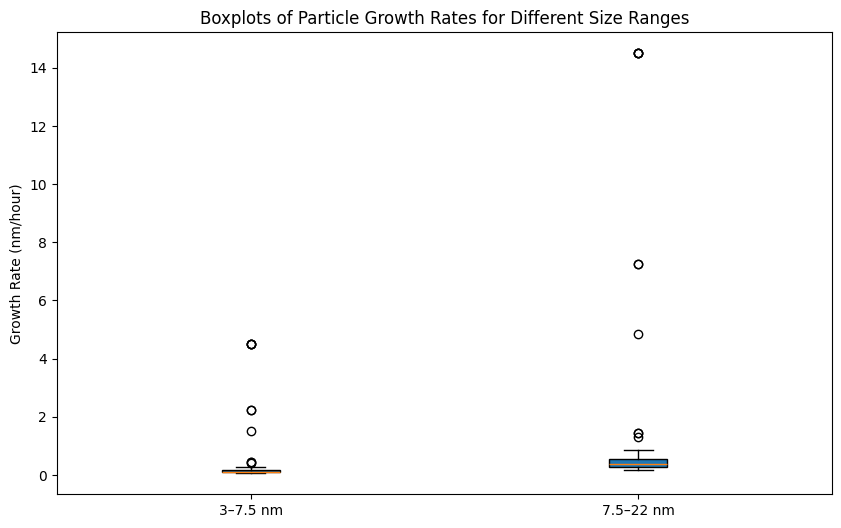

Mean growth rate for 3–7.5 nm: 0.59 nm/hour
Mean growth rate for 7.5–22 nm: 1.89 nm/hour


In [34]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Extract relevant group1
diameter = group1["diameter"]
time = group1["time"]

# Define size bins
size_bin_edges = [3e-9, 7.5e-9, 22e-9]  # Size bin edges in meters
time_resolution_hours = 1  # Dataset is hourly

# Function to extract group1 for a specific size bin
def extract_size_bin_data(group1, diameter, size_bin):
    mask = (diameter >= size_bin[0]) & (diameter <= size_bin[1])
    return group1[:, mask].mean(dim="diameter")

# Extract group1 for each size bin
size_bin_data = {
    f"{low*1e9:.1f}-{high*1e9:.1f} nm": extract_size_bin_data(
        group1, diameter, (low, high)
    ).values
    for low, high in zip(size_bin_edges[:-1], size_bin_edges[1:])
}

# Time array (numeric)
time_numeric = np.arange(len(time))

# Function to fit Gaussian
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

# Smooth the group1 and identify peaks
growth_rates_3_7_5 = []
growth_rates_7_5_22 = []

for (bin_name_1, concentration_1), (bin_name_2, concentration_2) in zip(
    size_bin_data.items(), list(size_bin_data.items())[1:]
):
    # Smooth group1 using a moving average
    window_size = 5
    concentration_1_smoothed = np.convolve(
        concentration_1, np.ones(window_size) / window_size, mode="valid"
    )
    concentration_2_smoothed = np.convolve(
        concentration_2, np.ones(window_size) / window_size, mode="valid"
    )
    
    # Identify peaks
    peaks_1, _ = find_peaks(concentration_1_smoothed)
    peaks_2, _ = find_peaks(concentration_2_smoothed)
    
    # Calculate growth rates
    for p1, p2 in zip(peaks_1, peaks_2):
        delta_t = (p2 - p1) * time_resolution_hours
        if delta_t > 0:  # Valid growth scenario
            if bin_name_1 == "3.0-7.5 nm":
                delta_size = size_bin_edges[1] - size_bin_edges[0]
                growth_rates_3_7_5.append(delta_size / delta_t * 1e9)  # Convert to nm/hour
            if bin_name_2 == "7.5-22.0 nm":
                delta_size = size_bin_edges[2] - size_bin_edges[1]
                growth_rates_7_5_22.append(delta_size / delta_t * 1e9)  # Convert to nm/hour

# Calculate mean growth rates
mean_gr_3_7_5 = np.mean(growth_rates_3_7_5)
mean_gr_7_5_22 = np.mean(growth_rates_7_5_22)

# Plot the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(
    [growth_rates_3_7_5, growth_rates_7_5_22],
    labels=["3–7.5 nm", "7.5–22 nm"],
    patch_artist=True,
)
plt.ylabel("Growth Rate (nm/hour)")
plt.title("Boxplots of Particle Growth Rates for Different Size Ranges")
plt.show()

# Print the mean growth rates
print(f"Mean growth rate for 3–7.5 nm: {mean_gr_3_7_5:.2f} nm/hour")
print(f"Mean growth rate for 7.5–22 nm: {mean_gr_7_5_22:.2f} nm/hour")


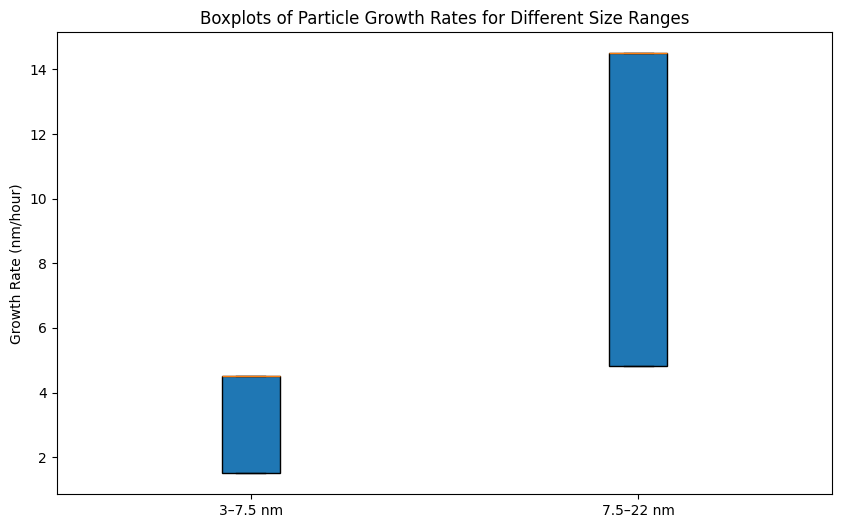

Mean growth rate for 3–7.5 nm: 3.30 nm/hour
Mean growth rate for 7.5–22 nm: 10.63 nm/hour


In [35]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Extract relevant group2
diameter = group2["diameter"]
time = group2["time"]

# Define size bins
size_bin_edges = [3e-9, 7.5e-9, 22e-9]  # Size bin edges in meters
time_resolution_hours = 1  # Dataset is hourly

# Function to extract group2 for a specific size bin
def extract_size_bin_data(group2, diameter, size_bin):
    mask = (diameter >= size_bin[0]) & (diameter <= size_bin[1])
    return group2[:, mask].mean(dim="diameter")

# Extract group2 for each size bin
size_bin_data = {
    f"{low*1e9:.1f}-{high*1e9:.1f} nm": extract_size_bin_data(
        group2, diameter, (low, high)
    ).values
    for low, high in zip(size_bin_edges[:-1], size_bin_edges[1:])
}

# Time array (numeric)
time_numeric = np.arange(len(time))

# Function to fit Gaussian
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

# Smooth the group2 and identify peaks
growth_rates_3_7_5 = []
growth_rates_7_5_22 = []

for (bin_name_1, concentration_1), (bin_name_2, concentration_2) in zip(
    size_bin_data.items(), list(size_bin_data.items())[1:]
):
    # Smooth group2 using a moving average
    window_size = 5
    concentration_1_smoothed = np.convolve(
        concentration_1, np.ones(window_size) / window_size, mode="valid"
    )
    concentration_2_smoothed = np.convolve(
        concentration_2, np.ones(window_size) / window_size, mode="valid"
    )
    
    # Identify peaks
    peaks_1, _ = find_peaks(concentration_1_smoothed)
    peaks_2, _ = find_peaks(concentration_2_smoothed)
    
    # Calculate growth rates
    for p1, p2 in zip(peaks_1, peaks_2):
        delta_t = (p2 - p1) * time_resolution_hours
        if delta_t > 0:  # Valid growth scenario
            if bin_name_1 == "3.0-7.5 nm":
                delta_size = size_bin_edges[1] - size_bin_edges[0]
                growth_rates_3_7_5.append(delta_size / delta_t * 1e9)  # Convert to nm/hour
            if bin_name_2 == "7.5-22.0 nm":
                delta_size = size_bin_edges[2] - size_bin_edges[1]
                growth_rates_7_5_22.append(delta_size / delta_t * 1e9)  # Convert to nm/hour

# Calculate mean growth rates
mean_gr_3_7_5 = np.mean(growth_rates_3_7_5)
mean_gr_7_5_22 = np.mean(growth_rates_7_5_22)

# Plot the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(
    [growth_rates_3_7_5, growth_rates_7_5_22],
    labels=["3–7.5 nm", "7.5–22 nm"],
    patch_artist=True,
)
plt.ylabel("Growth Rate (nm/hour)")
plt.title("Boxplots of Particle Growth Rates for Different Size Ranges")
plt.show()

# Print the mean growth rates
print(f"Mean growth rate for 3–7.5 nm: {mean_gr_3_7_5:.2f} nm/hour")
print(f"Mean growth rate for 7.5–22 nm: {mean_gr_7_5_22:.2f} nm/hour")


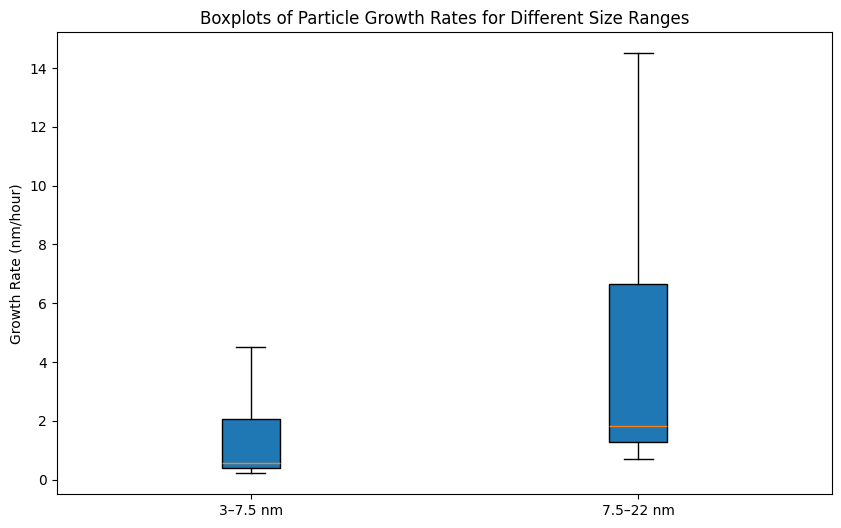

Mean growth rate for 3–7.5 nm: 1.48 nm/hour
Mean growth rate for 7.5–22 nm: 4.77 nm/hour


In [36]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Extract relevant group3
diameter = group3["diameter"]
time = group3["time"]

# Define size bins
size_bin_edges = [3e-9, 7.5e-9, 22e-9]  # Size bin edges in meters
time_resolution_hours = 1  # Dataset is hourly

# Function to extract group3 for a specific size bin
def extract_size_bin_data(group3, diameter, size_bin):
    mask = (diameter >= size_bin[0]) & (diameter <= size_bin[1])
    return group3[:, mask].mean(dim="diameter")

# Extract group3 for each size bin
size_bin_data = {
    f"{low*1e9:.1f}-{high*1e9:.1f} nm": extract_size_bin_data(
        group3, diameter, (low, high)
    ).values
    for low, high in zip(size_bin_edges[:-1], size_bin_edges[1:])
}

# Time array (numeric)
time_numeric = np.arange(len(time))

# Function to fit Gaussian
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

# Smooth the group3 and identify peaks
growth_rates_3_7_5 = []
growth_rates_7_5_22 = []

for (bin_name_1, concentration_1), (bin_name_2, concentration_2) in zip(
    size_bin_data.items(), list(size_bin_data.items())[1:]
):
    # Smooth group3 using a moving average
    window_size = 5
    concentration_1_smoothed = np.convolve(
        concentration_1, np.ones(window_size) / window_size, mode="valid"
    )
    concentration_2_smoothed = np.convolve(
        concentration_2, np.ones(window_size) / window_size, mode="valid"
    )
    
    # Identify peaks
    peaks_1, _ = find_peaks(concentration_1_smoothed)
    peaks_2, _ = find_peaks(concentration_2_smoothed)
    
    # Calculate growth rates
    for p1, p2 in zip(peaks_1, peaks_2):
        delta_t = (p2 - p1) * time_resolution_hours
        if delta_t > 0:  # Valid growth scenario
            if bin_name_1 == "3.0-7.5 nm":
                delta_size = size_bin_edges[1] - size_bin_edges[0]
                growth_rates_3_7_5.append(delta_size / delta_t * 1e9)  # Convert to nm/hour
            if bin_name_2 == "7.5-22.0 nm":
                delta_size = size_bin_edges[2] - size_bin_edges[1]
                growth_rates_7_5_22.append(delta_size / delta_t * 1e9)  # Convert to nm/hour

# Calculate mean growth rates
mean_gr_3_7_5 = np.mean(growth_rates_3_7_5)
mean_gr_7_5_22 = np.mean(growth_rates_7_5_22)

# Plot the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(
    [growth_rates_3_7_5, growth_rates_7_5_22],
    labels=["3–7.5 nm", "7.5–22 nm"],
    patch_artist=True,
)
plt.ylabel("Growth Rate (nm/hour)")
plt.title("Boxplots of Particle Growth Rates for Different Size Ranges")
plt.show()

# Print the mean growth rates
print(f"Mean growth rate for 3–7.5 nm: {mean_gr_3_7_5:.2f} nm/hour")
print(f"Mean growth rate for 7.5–22 nm: {mean_gr_7_5_22:.2f} nm/hour")


### Calculate Condensation Sink

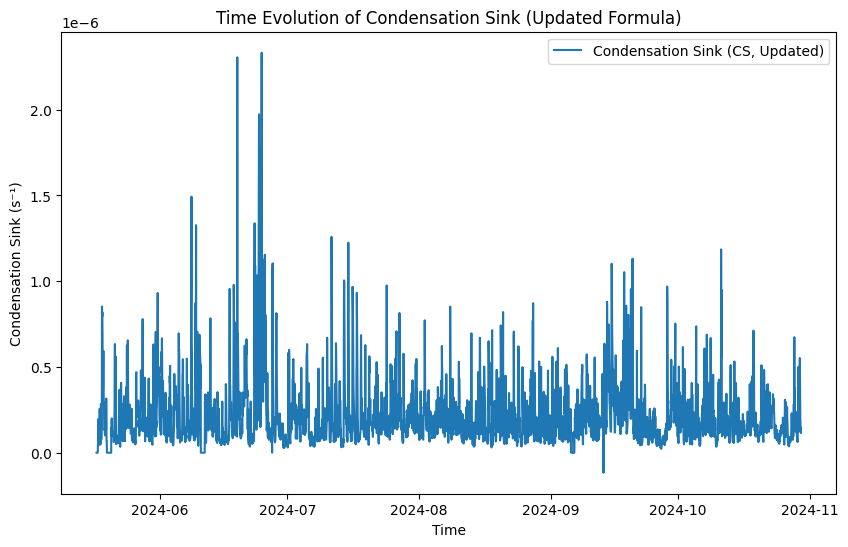

2.153223791642732e-07

In [38]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Constants for condensation sink calculation
diffusion_coefficient = 0.05 * 1e-4  # Diffusion coefficient in m²/s (0.05 cm²/s)

# Extract particle diameter and concentrations
diameter = particles["diameter"].values  # Particle diameter in meters

# Calculate particle radii (r_i)
radius = diameter / 2

# Constants for the updated CS calculation
mean_free_path = 6.5e-8  # Mean free path of air molecules in meters
accommodation_coefficient = 1.0  # Assumption for complete accommodation
diffusion_coefficient = 0.05 * 1e-4  # Diffusion coefficient in m²/s (0.05 cm²/s)

# Calculate the Knudsen number (Kn) for each size bin
knudsen_number = mean_free_path / (radius)

# Calculate the transition regime correction factor (β_m)
beta_m = (1 + knudsen_number) / (1 + knudsen_number + (4 / 3) * knudsen_number * accommodation_coefficient)

# Updated CS calculation with β_m
cs_time_series_updated = 2 * np.pi * diffusion_coefficient * (
    beta_m * diameter * particles
).sum(dim="diameter")

# Convert to a numpy array for further manipulation
cs_values_updated = cs_time_series_updated.values

# Plot the updated condensation sink over time
plt.figure(figsize=(10, 6))
plt.plot(particles["time"].values, cs_values_updated, label="Condensation Sink (CS, Updated)")
plt.xlabel("Time")
plt.ylabel("Condensation Sink (s⁻¹)")
plt.title("Time Evolution of Condensation Sink (Updated Formula)")
plt.legend()
plt.show()

# Display the mean condensation sink value
cs_mean_updated = np.nanmean(cs_values_updated)
cs_mean_updated


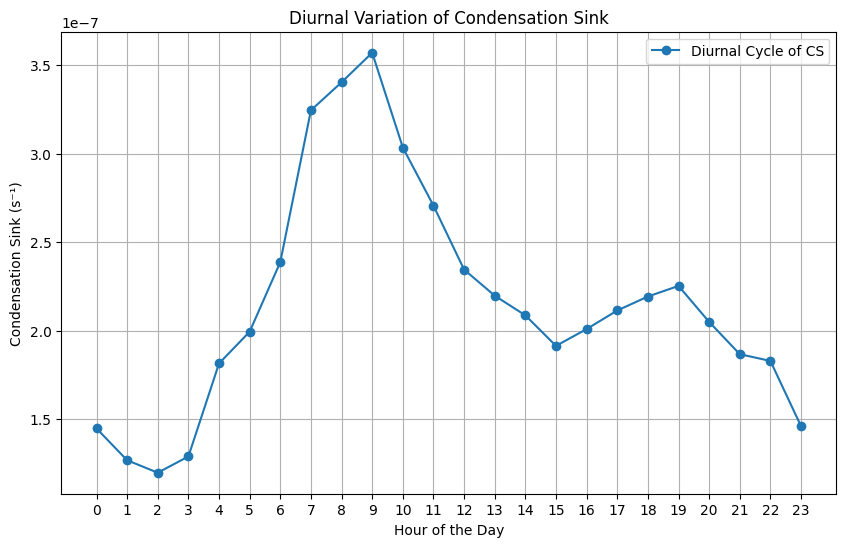

CS
time              
0     1.448042e-07
1     1.268334e-07
2     1.197905e-07
3     1.289820e-07
4     1.815307e-07
5     1.994635e-07
6     2.387818e-07
7     3.245459e-07
8     3.403547e-07
9     3.570567e-07
10    3.035051e-07
11    2.706799e-07
12    2.345460e-07
13    2.198014e-07
14    2.087008e-07
15    1.914470e-07
16    2.009537e-07
17    2.114367e-07
18    2.193222e-07
19    2.253239e-07
20    2.049794e-07
21    1.867633e-07
22    1.829346e-07
23    1.460492e-07

In [40]:
import pandas as pd

# Extract the time data as a pandas datetime index for easier grouping
time_series = particles["time"].to_index()

# Group CS values by hour of the day to calculate the diurnal cycle
cs_diurnal = (
    pd.DataFrame({"CS": cs_values_updated}, index=time_series)
    .groupby(time_series.hour)
    .mean()
)

# Plot the diurnal cycle
plt.figure(figsize=(10, 6))
plt.plot(cs_diurnal.index, cs_diurnal["CS"], marker='o', label="Diurnal Cycle of CS")
plt.xlabel("Hour of the Day")
plt.ylabel("Condensation Sink (s⁻¹)")
plt.title("Diurnal Variation of Condensation Sink")
plt.xticks(ticks=np.arange(0, 24, 1))
plt.grid(True)
plt.legend()
plt.show()

# Display the diurnal CS values for reference
cs_diurnal


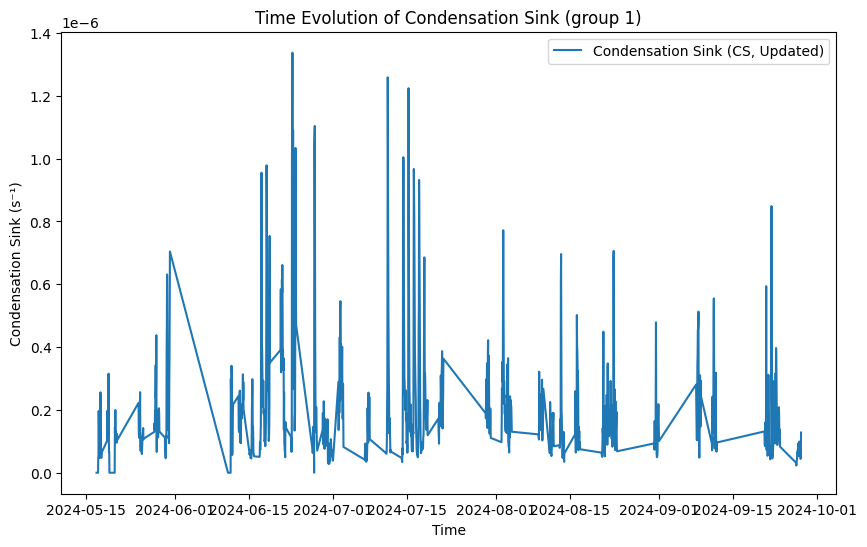

1.9634081369694727e-07

In [41]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Constants for condensation sink calculation
diffusion_coefficient = 0.05 * 1e-4  # Diffusion coefficient in m²/s (0.05 cm²/s)

# Extract particle diameter and concentrations
diameter = group1["diameter"].values  # Particle diameter in meters

# Calculate particle radii (r_i)
radius = diameter / 2

# Constants for the updated CS calculation
mean_free_path = 6.5e-8  # Mean free path of air molecules in meters
accommodation_coefficient = 1.0  # Assumption for complete accommodation
diffusion_coefficient = 0.05 * 1e-4  # Diffusion coefficient in m²/s (0.05 cm²/s)

# Calculate the Knudsen number (Kn) for each size bin
knudsen_number = mean_free_path / (radius)

# Calculate the transition regime correction factor (β_m)
beta_m = (1 + knudsen_number) / (1 + knudsen_number + (4 / 3) * knudsen_number * accommodation_coefficient)

# Updated CS calculation with β_m
cs_time_series_updated = 2 * np.pi * diffusion_coefficient * (
    beta_m * diameter * group1
).sum(dim="diameter")

# Convert to a numpy array for further manipulation
cs_values_updated = cs_time_series_updated.values

# Plot the updated condensation sink over time
plt.figure(figsize=(10, 6))
plt.plot(group1["time"].values, cs_values_updated, label="Condensation Sink (CS, Updated)")
plt.xlabel("Time")
plt.ylabel("Condensation Sink (s⁻¹)")
plt.title("Time Evolution of Condensation Sink (group 1)")
plt.legend()
plt.show()

# Display the mean condensation sink value
cs_mean_updated = np.nanmean(cs_values_updated)
cs_mean_updated


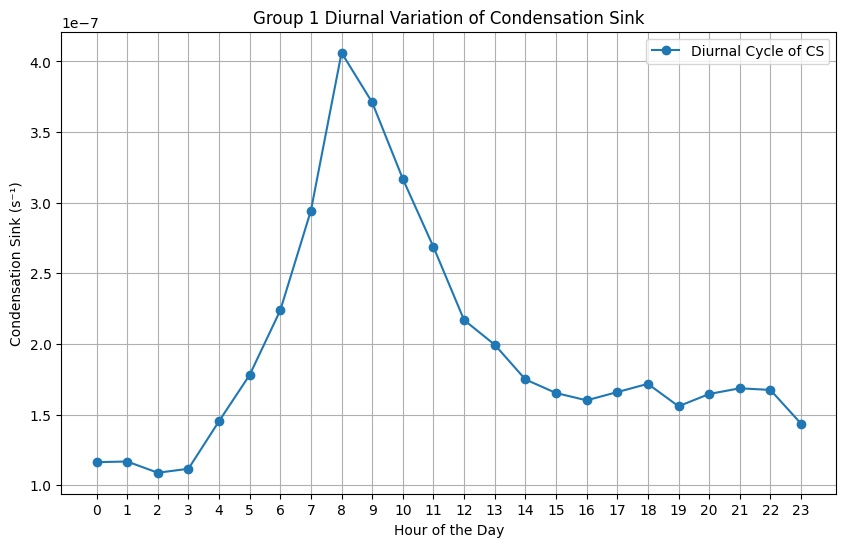

CS
time              
0     1.163191e-07
1     1.167883e-07
2     1.088471e-07
3     1.116291e-07
4     1.453343e-07
5     1.780529e-07
6     2.238301e-07
7     2.944535e-07
8     4.061356e-07
9     3.709668e-07
10    3.168065e-07
11    2.686308e-07
12    2.169092e-07
13    1.994401e-07
14    1.749010e-07
15    1.652782e-07
16    1.600844e-07
17    1.659160e-07
18    1.717691e-07
19    1.558775e-07
20    1.645798e-07
21    1.686060e-07
22    1.674461e-07
23    1.435781e-07

In [42]:
import pandas as pd

# Extract the time data as a pandas datetime index for easier grouping
time_series = group1["time"].to_index()

# Group CS values by hour of the day to calculate the diurnal cycle
cs_diurnal = (
    pd.DataFrame({"CS": cs_values_updated}, index=time_series)
    .groupby(time_series.hour)
    .mean()
)

# Plot the diurnal cycle
plt.figure(figsize=(10, 6))
plt.plot(cs_diurnal.index, cs_diurnal["CS"], marker='o', label="Diurnal Cycle of CS")
plt.xlabel("Hour of the Day")
plt.ylabel("Condensation Sink (s⁻¹)")
plt.title("Group 1 Diurnal Variation of Condensation Sink")
plt.xticks(ticks=np.arange(0, 24, 1))
plt.grid(True)
plt.legend()
plt.show()

# Display the diurnal CS values for reference
cs_diurnal


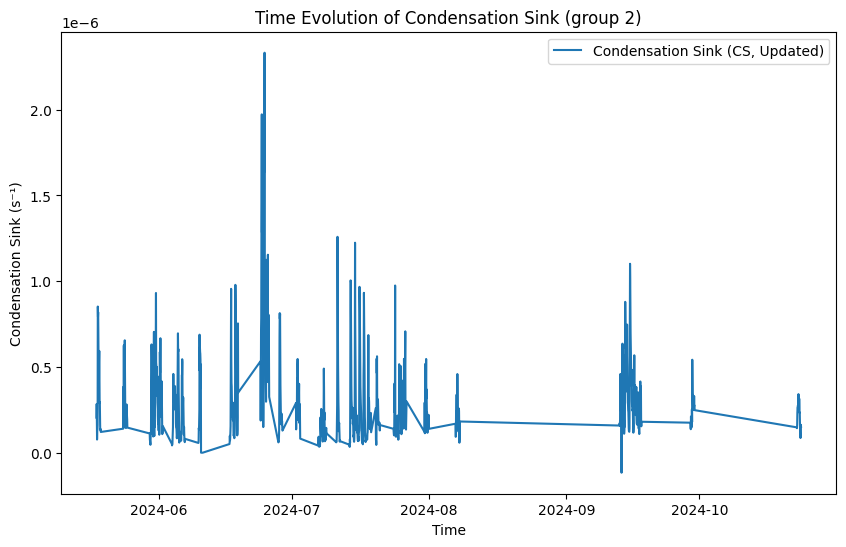

2.9964297562607116e-07

In [43]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Constants for condensation sink calculation
diffusion_coefficient = 0.05 * 1e-4  # Diffusion coefficient in m²/s (0.05 cm²/s)

# Extract particle diameter and concentrations
diameter = group2["diameter"].values  # Particle diameter in meters

# Calculate particle radii (r_i)
radius = diameter / 2

# Constants for the updated CS calculation
mean_free_path = 6.5e-8  # Mean free path of air molecules in meters
accommodation_coefficient = 1.0  # Assumption for complete accommodation
diffusion_coefficient = 0.05 * 1e-4  # Diffusion coefficient in m²/s (0.05 cm²/s)

# Calculate the Knudsen number (Kn) for each size bin
knudsen_number = mean_free_path / (radius)

# Calculate the transition regime correction factor (β_m)
beta_m = (1 + knudsen_number) / (1 + knudsen_number + (4 / 3) * knudsen_number * accommodation_coefficient)

# Updated CS calculation with β_m
cs_time_series_updated = 2 * np.pi * diffusion_coefficient * (
    beta_m * diameter * group2
).sum(dim="diameter")

# Convert to a numpy array for further manipulation
cs_values_updated = cs_time_series_updated.values

# Plot the updated condensation sink over time
plt.figure(figsize=(10, 6))
plt.plot(group2["time"].values, cs_values_updated, label="Condensation Sink (CS, Updated)")
plt.xlabel("Time")
plt.ylabel("Condensation Sink (s⁻¹)")
plt.title("Time Evolution of Condensation Sink (group 2)")
plt.legend()
plt.show()

# Display the mean condensation sink value
cs_mean_updated = np.nanmean(cs_values_updated)
cs_mean_updated


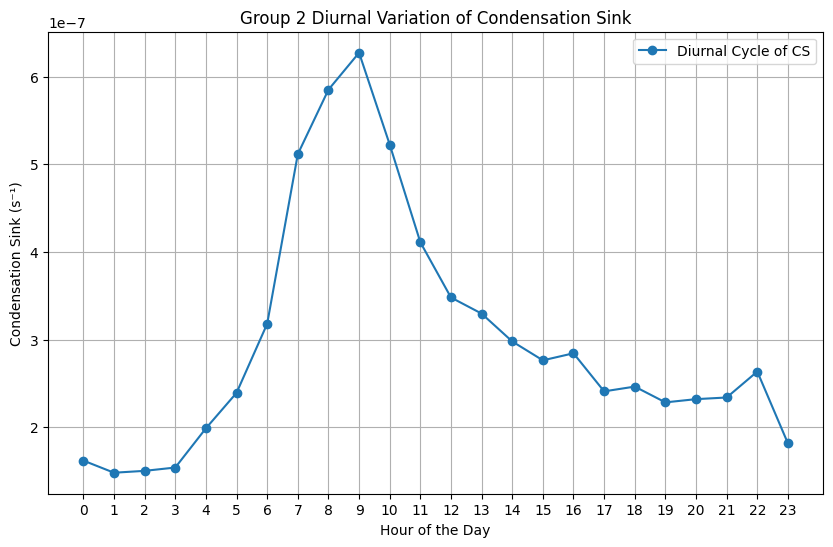

CS
time              
0     1.619050e-07
1     1.480586e-07
2     1.501910e-07
3     1.539887e-07
4     1.987435e-07
5     2.392145e-07
6     3.180198e-07
7     5.116940e-07
8     5.852544e-07
9     6.274561e-07
10    5.226526e-07
11    4.111300e-07
12    3.480742e-07
13    3.296854e-07
14    2.979081e-07
15    2.763465e-07
16    2.843895e-07
17    2.409262e-07
18    2.463637e-07
19    2.283524e-07
20    2.320432e-07
21    2.339192e-07
22    2.635354e-07
23    1.815795e-07

In [44]:
import pandas as pd

# Extract the time data as a pandas datetime index for easier grouping
time_series = group2["time"].to_index()

# Group CS values by hour of the day to calculate the diurnal cycle
cs_diurnal = (
    pd.DataFrame({"CS": cs_values_updated}, index=time_series)
    .groupby(time_series.hour)
    .mean()
)

# Plot the diurnal cycle
plt.figure(figsize=(10, 6))
plt.plot(cs_diurnal.index, cs_diurnal["CS"], marker='o', label="Diurnal Cycle of CS")
plt.xlabel("Hour of the Day")
plt.ylabel("Condensation Sink (s⁻¹)")
plt.title("Group 2 Diurnal Variation of Condensation Sink")
plt.xticks(ticks=np.arange(0, 24, 1))
plt.grid(True)
plt.legend()
plt.show()

# Display the diurnal CS values for reference
cs_diurnal


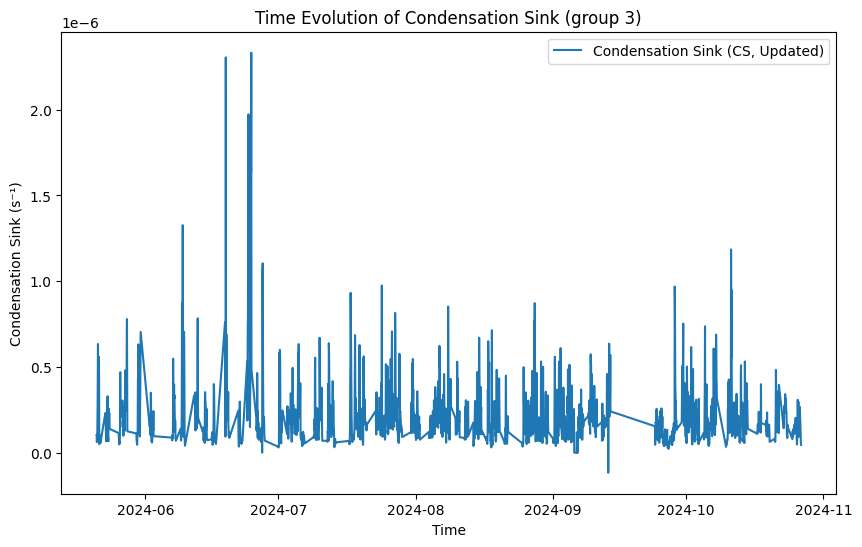

2.0601956735108457e-07

In [45]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Constants for condensation sink calculation
diffusion_coefficient = 0.05 * 1e-4  # Diffusion coefficient in m²/s (0.05 cm²/s)

# Extract particle diameter and concentrations
diameter = group3["diameter"].values  # Particle diameter in meters

# Calculate particle radii (r_i)
radius = diameter / 2

# Constants for the updated CS calculation
mean_free_path = 6.5e-8  # Mean free path of air molecules in meters
accommodation_coefficient = 1.0  # Assumption for complete accommodation
diffusion_coefficient = 0.05 * 1e-4  # Diffusion coefficient in m²/s (0.05 cm²/s)

# Calculate the Knudsen number (Kn) for each size bin
knudsen_number = mean_free_path / (radius)

# Calculate the transition regime correction factor (β_m)
beta_m = (1 + knudsen_number) / (1 + knudsen_number + (4 / 3) * knudsen_number * accommodation_coefficient)

# Updated CS calculation with β_m
cs_time_series_updated = 2 * np.pi * diffusion_coefficient * (
    beta_m * diameter * group3
).sum(dim="diameter")

# Convert to a numpy array for further manipulation
cs_values_updated = cs_time_series_updated.values

# Plot the updated condensation sink over time
plt.figure(figsize=(10, 6))
plt.plot(group3["time"].values, cs_values_updated, label="Condensation Sink (CS, Updated)")
plt.xlabel("Time")
plt.ylabel("Condensation Sink (s⁻¹)")
plt.title("Time Evolution of Condensation Sink (group 3)")
plt.legend()
plt.show()

# Display the mean condensation sink value
cs_mean_updated = np.nanmean(cs_values_updated)
cs_mean_updated


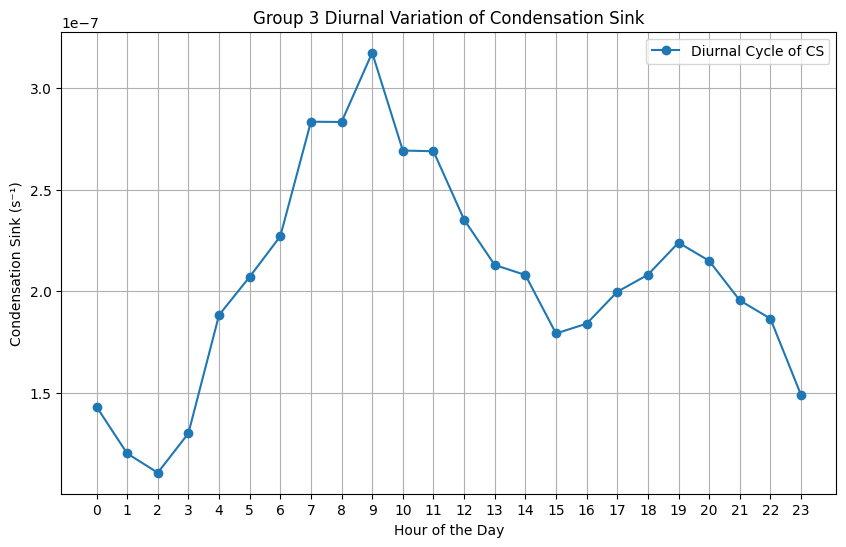

CS
time              
0     1.431780e-07
1     1.201706e-07
2     1.106886e-07
3     1.300798e-07
4     1.882639e-07
5     2.070535e-07
6     2.270151e-07
7     2.833763e-07
8     2.832471e-07
9     3.173193e-07
10    2.691933e-07
11    2.688490e-07
12    2.351962e-07
13    2.128993e-07
14    2.079673e-07
15    1.791997e-07
16    1.840115e-07
17    1.997026e-07
18    2.080764e-07
19    2.238850e-07
20    2.149343e-07
21    1.954776e-07
22    1.864842e-07
23    1.488992e-07

In [46]:
import pandas as pd

# Extract the time data as a pandas datetime index for easier grouping
time_series = group3["time"].to_index()

# Group CS values by hour of the day to calculate the diurnal cycle
cs_diurnal = (
    pd.DataFrame({"CS": cs_values_updated}, index=time_series)
    .groupby(time_series.hour)
    .mean()
)

# Plot the diurnal cycle
plt.figure(figsize=(10, 6))
plt.plot(cs_diurnal.index, cs_diurnal["CS"], marker='o', label="Diurnal Cycle of CS")
plt.xlabel("Hour of the Day")
plt.ylabel("Condensation Sink (s⁻¹)")
plt.title("Group 3 Diurnal Variation of Condensation Sink")
plt.xticks(ticks=np.arange(0, 24, 1))
plt.grid(True)
plt.legend()
plt.show()

# Display the diurnal CS values for reference
cs_diurnal


### Calculate Coagulation Sink

In [ ]:
# Define diameter ranges for the calculation in meters
ranges = {
    "3-7.5 nm": (3e-9, 7.5e-9),
    "7.5-22 nm": (7.5e-9, 22e-9)
}

# Initialize dictionary to store coagulation sinks for each range
coagulation_sink_ranges = {key: np.zeros(len(data["time"])) for key in ranges.keys()}

# Calculate CoagS for specific diameter ranges
for range_name, (d_min, d_max) in ranges.items():
    # Identify indices for the range
    range_indices = (diameter >= d_min) & (diameter <= d_max)
    
    # Recalculate CoagS for each time step for the given range
    for t_idx in range(len(data["time"])):
        n_t = particle_concentration_filled[t_idx, :].values  # Particle concentrations at time t
        coag_s_t = 0  # Initialize coagulation sink for this time step
        
        # Iterate only over the selected D_p range
        for i in np.where(range_indices)[0]:
            dp = diameter[i]  # Diameter of particles in bin i
            radius_p = dp / 2
            for j in range(len(diameter)):  # Include all D_q in the interaction
                dq = diameter[j]
                radius_q = dq / 2
                kernel = coagulation_kernel(dp, dq, radius_p, radius_q)
                coag_s_t += kernel * n_t[j] * dp  # Coagulation kernel contribution

        coagulation_sink_ranges[range_name][t_idx] = coag_s_t  # Store the sink

# Plot coagulation sink over time for each range
plt.figure(figsize=(12, 6))
for range_name, sink_values in coagulation_sink_ranges.items():
    plt.plot(data["time"].values, sink_values, label=f"CoagS ({range_name})")
plt.xlabel("Time")
plt.ylabel("Coagulation Sink (s⁻¹)")
plt.title("Time Evolution of Coagulation Sink for Specific Diameter Ranges")
plt.legend()
plt.show()

# Compute and display mean CoagS values for each range
mean_coag_sinks = {range_name: np.nanmean(sink_values) for range_name, sink_values in coagulation_sink_ranges.items()}
mean_coag_sinks


### Calculate J

In [49]:
# Use the recalculated GR to refine the particle formation rate J calculation

# Update the size range dictionary to include the recalculated GR values (converted to m/s)
recalculated_gr_m_per_s = {
    "3-7.5 nm": mean_gr_3_7_5 * 1e-9 / 3600,  # Convert nm/h to m/s
    "7.5-22 nm": mean_gr_7_5_22 * 1e-9 / 3600
}

# Define size ranges for GR and J calculation
size_ranges = {
    "3-7.5 nm": (3e-9, 7.5e-9),
    "7.5-22 nm": (7.5e-9, 22e-9)
}

# Extract particle diameter and concentration data
diameter = particles["diameter"].values  # Particle diameters in meters
time = particles["time"]

# Coagulation Kernel Function
def coagulation_kernel(dp, dq, radius_p, radius_q, temperature=298, viscosity=1.8e-5):
    k_b = 1.38e-23  # Boltzmann constant (J/K)
    mean_free_path = 6.5e-8  # Mean free path of air molecules (m)
    diffusion_p = k_b * temperature / (3 * np.pi * viscosity * dp)  # Diffusion coeff.
    diffusion_q = k_b * temperature / (3 * np.pi * viscosity * dq)  # Diffusion coeff.
    
    reduced_radius = radius_p + radius_q
    fuchs_correction = (1 + mean_free_path / reduced_radius) / (
        1 + mean_free_path / reduced_radius + (4 / 3) * mean_free_path / reduced_radius
    )
    return 2 * np.pi * reduced_radius * (diffusion_p + diffusion_q) * fuchs_correction


# Coagulation Sink Calculation
def calculate_coagulation_sink(particle_concentration, diameter):
    coagulation_sink = np.zeros(len(data["time"]))
    radius = diameter / 2
    for t_idx in range(len(data["time"])):
        n_t = particle_concentration[t_idx, :].values  # Particle concentrations at time t
        coag_s_t = 0
        for i in range(len(diameter)):
            dp = diameter[i]
            radius_p = dp / 2
            for j in range(len(diameter)):
                dq = diameter[j]
                radius_q = dq / 2
                kernel = coagulation_kernel(dp, dq, radius_p, radius_q)
                coag_s_t += kernel * n_t[j] * dp
        coagulation_sink[t_idx] = coag_s_t
    return coagulation_sink

# Calculate CoagS
coag_s = calculate_coagulation_sink(particles, diameter)

# Initialize dictionary for particle formation rates (J) using recalculated GR
formation_rates_refined = {key: np.zeros(len(data["time"])) for key in size_ranges.keys()}

# Calculate J for each size range using the recalculated GR
for range_label, (dp1, dp2) in size_ranges.items():
    # Identify indices for the size range
    range_indices = (diameter >= dp1) & (diameter <= dp2)
    
    # Extract total particle concentration (N) for the range
    N_range = particles[:, range_indices].sum(dim="diameter")
    
    # Compute dN/dt (time derivative of N)
    dN_dt_range = np.gradient(N_range, edge_order=2)
    
    # Size range width (ΔDp)
    delta_dp = dp2 - dp1
    
    # Use recalculated GR
    gr = recalculated_gr_m_per_s[range_label]
    
    # Calculate J
    for t_idx in range(len(data["time"])):
        formation_rates_refined[range_label][t_idx] = (
            dN_dt_range[t_idx]
            + coag_s[t_idx] * N_range[t_idx]
            + (gr / delta_dp) * N_range[t_idx]
        )

# Plot particle formation rates (J) over time with recalculated GR
plt.figure(figsize=(12, 6))
for range_label, rates in formation_rates_refined.items():
    plt.plot(data["time"].values, rates, label=f"Formation Rate J ({range_label})")
plt.xlabel("Time")
plt.ylabel("Particle Formation Rate J (s⁻¹)")
plt.title("Time Evolution of Particle Formation Rate J (Using Recalculated GR)")
plt.legend()
plt.show()

# Compute and display mean particle formation rates for each range
mean_formation_rates_refined = {
    range_label: np.nanmean(rates) for range_label, rates in formation_rates_refined.items()
}
mean_formation_rates_refined


KeyError: 'time'

/tmp/ipykernel_6638/3877129973.py:35: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(gaussian, time_numeric[valid_mask], n_range[valid_mask],
/tmp/ipykernel_6638/3877129973.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  growth_rate = (dp2 - dp1) / (peak_time * 3600)  # Convert to nm/h
/tmp/ipykernel_6638/3877129973.py:35: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(gaussian, time_numeric[valid_mask], n_range[valid_mask],
/tmp/ipykernel_6638/3877129973.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  growth_rate = (dp2 - dp1) / (peak_time * 3600)  # Convert to nm/h
/home/coliewo/.local/lib/python3.10/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in multiply
  result_data = func(*input_data)
/home/coliewo/.local/lib/python3.10/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in

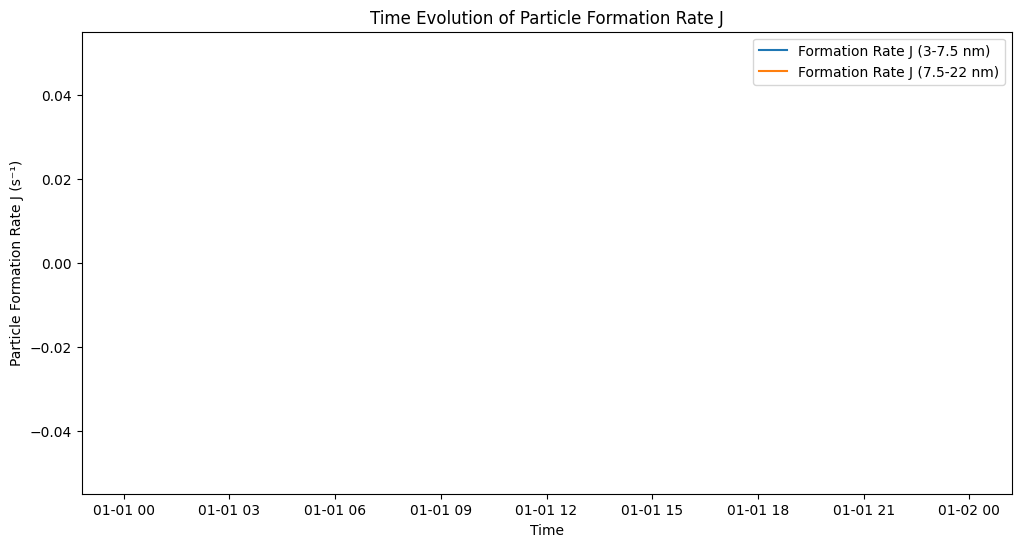

/tmp/ipykernel_6638/3877129973.py:128: RuntimeWarning: Mean of empty slice
  range_label: np.nanmean(rates) for range_label, rates in formation_rates.items()


({'3-7.5 nm': inf, '7.5-22 nm': inf}, {'3-7.5 nm': nan, '7.5-22 nm': nan})

In [52]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


# Extract particle diameter and concentration particles
diameter = particles["diameter"].values  # Particle diameters in meters
time = particles["time"]

# Define size ranges for GR and J calculation
size_ranges = {
    "3-7.5 nm": (3e-9, 7.5e-9),
    "7.5-22 nm": (7.5e-9, 22e-9)
}

# Function to calculate GR using Gaussian fitting on particle concentrations
def calculate_growth_rate(particle_concentration, diameter, size_ranges):
    growth_rates = {}
    for range_label, (dp1, dp2) in size_ranges.items():
        # Extract the size range
        range_indices = (diameter >= dp1) & (diameter <= dp2)
        n_range = particle_concentration[:, range_indices].mean(dim="diameter").values
        
        # Fit a Gaussian to the time evolution of the particle concentration
        def gaussian(x, a, x0, sigma):
            return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
        
        time_numeric = np.arange(len(time))
        valid_mask = ~np.isnan(n_range)
        
        if np.sum(valid_mask) > 10:  # Ensure sufficient particles points
            try:
                popt, _ = curve_fit(gaussian, time_numeric[valid_mask], n_range[valid_mask], 
                                    p0=[np.max(n_range), time_numeric[np.argmax(n_range)], 10])
                peak_time = popt[1]
                growth_rate = (dp2 - dp1) / (peak_time * 3600)  # Convert to nm/h
                growth_rates[range_label] = growth_rate
            except RuntimeError:
                growth_rates[range_label] = np.nan
        else:
            growth_rates[range_label] = np.nan
    return growth_rates

# Calculate Growth Rates (GR)
growth_rates = calculate_growth_rate(particles, diameter, size_ranges)

# Convert GR to m/s
for key in growth_rates:
    if not np.isnan(growth_rates[key]):
        growth_rates[key] *= 1e-9 / 3600  # Convert from nm/h to m/s

# Coagulation Kernel Function
def coagulation_kernel(dp, dq, radius_p, radius_q, temperature=298, viscosity=1.8e-5):
    k_b = 1.38e-23  # Boltzmann constant (J/K)
    mean_free_path = 6.5e-8  # Mean free path of air molecules (m)
    diffusion_p = k_b * temperature / (3 * np.pi * viscosity * dp)  # Diffusion coeff.
    diffusion_q = k_b * temperature / (3 * np.pi * viscosity * dq)  # Diffusion coeff.
    
    reduced_radius = radius_p + radius_q
    fuchs_correction = (1 + mean_free_path / reduced_radius) / (
        1 + mean_free_path / reduced_radius + (4 / 3) * mean_free_path / reduced_radius
    )
    return 2 * np.pi * reduced_radius * (diffusion_p + diffusion_q) * fuchs_correction

# Coagulation Sink Calculation
def calculate_coagulation_sink(particle_concentration, diameter):
    coagulation_sink = np.zeros(len(particles["time"]))
    radius = diameter / 2
    for t_idx in range(len(particles["time"])):
        n_t = particle_concentration[t_idx, :].values  # Particle concentrations at time t
        coag_s_t = 0
        for i in range(len(diameter)):
            dp = diameter[i]
            radius_p = dp / 2
            for j in range(len(diameter)):
                dq = diameter[j]
                radius_q = dq / 2
                kernel = coagulation_kernel(dp, dq, radius_p, radius_q)
                coag_s_t += kernel * n_t[j] * dp
        coagulation_sink[t_idx] = coag_s_t
    return coagulation_sink

# Calculate CoagS
coag_s = calculate_coagulation_sink(particles, diameter)

# Initialize dictionary for particle formation rates (J)
formation_rates = {key: np.zeros(len(particles["time"])) for key in size_ranges.keys()}

# Calculate J for each range
for range_label, (dp1, dp2) in size_ranges.items():
    # Identify indices for the size range
    range_indices = (diameter >= dp1) & (diameter <= dp2)
    
    # Extract total particle concentration (N) for the range
    N_range = particles[:, range_indices].sum(dim="diameter")
    
    # Compute dN/dt (time derivative of N)
    dN_dt_range = np.gradient(N_range, edge_order=2)
    
    # Size range width (ΔDp)
    delta_dp = dp2 - dp1
    
    # Use calculated GR
    gr = growth_rates[range_label] if range_label in growth_rates else 0.0
    
    # Calculate J
    for t_idx in range(len(particles["time"])):
        formation_rates[range_label][t_idx] = (
            dN_dt_range[t_idx]
            + coag_s[t_idx] * N_range[t_idx]
            + (gr / delta_dp) * N_range[t_idx]
        )

# Plot particle formation rates (J) over time
plt.figure(figsize=(12, 6))
for range_label, rates in formation_rates.items():
    plt.plot(particles["time"].values, rates, label=f"Formation Rate J ({range_label})")
plt.xlabel("Time")
plt.ylabel("Particle Formation Rate J (s⁻¹)")
plt.title("Time Evolution of Particle Formation Rate J")
plt.legend()
plt.show()

# Compute and display mean particle formation rates for each range
mean_formation_rates = {
    range_label: np.nanmean(rates) for range_label, rates in formation_rates.items()
}
growth_rates, mean_formation_rates


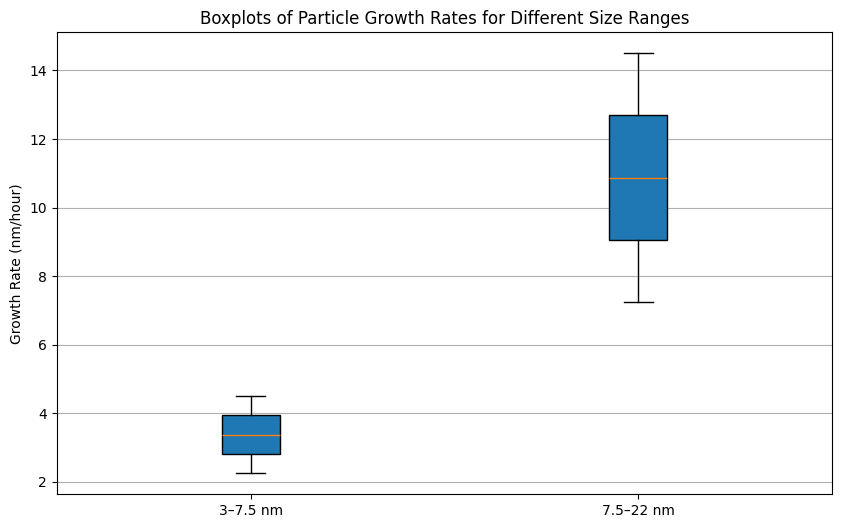

(3.374999999999999, 10.875)

In [53]:
from scipy.signal import find_peaks



# Define size bins
size_bin_edges = [3e-9, 7.5e-9, 22e-9]  # Size bin edges in meters
time_resolution_hours = 1  # Dataset is hourly

# Function to extract particles for a specific size bin
def extract_size_bin_data(particles, diameter, size_bin):
    mask = (diameter >= size_bin[0]) & (diameter <= size_bin[1])
    return particles[:, mask].mean(dim="diameter")

# Extract particles for each size bin
size_bin_data = {
    f"{low*1e9:.1f}-{high*1e9:.1f} nm": extract_size_bin_data(
        particles, diameter, (low, high)
    ).values
    for low, high in zip(size_bin_edges[:-1], size_bin_edges[1:])
}

# Time array (numeric)
time_numeric = np.arange(len(time))

# Smooth the particles and identify peaks
growth_rates_3_7_5 = []
growth_rates_7_5_22 = []

for (bin_name_1, concentration_1), (bin_name_2, concentration_2) in zip(
    size_bin_data.items(), list(size_bin_data.items())[1:]
):
    # Smooth particles using a moving average
    window_size = 5
    concentration_1_smoothed = np.convolve(
        concentration_1, np.ones(window_size) / window_size, mode="valid"
    )
    concentration_2_smoothed = np.convolve(
        concentration_2, np.ones(window_size) / window_size, mode="valid"
    )
    
    # Identify peaks
    peaks_1, _ = find_peaks(concentration_1_smoothed)
    peaks_2, _ = find_peaks(concentration_2_smoothed)
    
    # Calculate growth rates
    for p1, p2 in zip(peaks_1, peaks_2):
        delta_t = (p2 - p1) * time_resolution_hours
        if delta_t > 0:  # Valid growth scenario
            if bin_name_1 == "3.0-7.5 nm":
                delta_size = size_bin_edges[1] - size_bin_edges[0]
                growth_rates_3_7_5.append(delta_size / delta_t * 1e9)  # Convert to nm/hour
            if bin_name_2 == "7.5-22.0 nm":
                delta_size = size_bin_edges[2] - size_bin_edges[1]
                growth_rates_7_5_22.append(delta_size / delta_t * 1e9)  # Convert to nm/hour

# Calculate mean growth rates
mean_gr_3_7_5 = np.mean(growth_rates_3_7_5)
mean_gr_7_5_22 = np.mean(growth_rates_7_5_22)

# Plot the boxplots
plt.figure(figsize=(10, 6))
plt.boxplot(
    [growth_rates_3_7_5, growth_rates_7_5_22],
    labels=["3–7.5 nm", "7.5–22 nm"],
    patch_artist=True,
)
plt.ylabel("Growth Rate (nm/hour)")
plt.title("Boxplots of Particle Growth Rates for Different Size Ranges")
plt.grid(axis="y")
plt.show()

# Output the mean growth rates
mean_gr_3_7_5, mean_gr_7_5_22


In [54]:
# Use the recalculated GR to refine the particle formation rate J calculation

# Update the size range dictionary to include the recalculated GR values (converted to m/s)
recalculated_gr_m_per_s = {
    "3-7.5 nm": mean_gr_3_7_5 * 1e-9 / 3600,  # Convert nm/h to m/s
    "7.5-22 nm": mean_gr_7_5_22 * 1e-9 / 3600
}

# Initialize dictionary for particle formation rates (J) using recalculated GR
formation_rates_refined = {key: np.zeros(len(data["time"])) for key in size_ranges.keys()}

# Calculate J for each size range using the recalculated GR
for range_label, (dp1, dp2) in size_ranges.items():
    # Identify indices for the size range
    range_indices = (diameter >= dp1) & (diameter <= dp2)
    
    # Extract total particle concentration (N) for the range
    N_range = particles[:, range_indices].sum(dim="diameter")
    
    # Compute dN/dt (time derivative of N)
    dN_dt_range = np.gradient(N_range, edge_order=2)
    
    # Size range width (ΔDp)
    delta_dp = dp2 - dp1
    
    # Use recalculated GR
    gr = recalculated_gr_m_per_s[range_label]
    
    # Calculate J
    for t_idx in range(len(data["time"])):
        formation_rates_refined[range_label][t_idx] = (
            dN_dt_range[t_idx]
            + coag_s[t_idx] * N_range[t_idx]
            + (gr / delta_dp) * N_range[t_idx]
        )

# Plot particle formation rates (J) over time with recalculated GR
plt.figure(figsize=(12, 6))
for range_label, rates in formation_rates_refined.items():
    plt.plot(data["time"].values, rates, label=f"Formation Rate J ({range_label})")
plt.xlabel("Time")
plt.ylabel("Particle Formation Rate J (s⁻¹)")
plt.title("Time Evolution of Particle Formation Rate J (Using Recalculated GR)")
plt.legend()
plt.show()

# Compute and display mean particle formation rates for each range
mean_formation_rates_refined = {
    range_label: np.nanmean(rates) for range_label, rates in formation_rates_refined.items()
}
mean_formation_rates_refined


KeyError: 'time'

In [48]:
particles

<xarray.DataArray (time: 3986, diameter: 55)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [           nan,            nan,            nan, ...,
        23576.20967629, 22110.026076  , 20655.16787305],
       [           nan,            nan,            nan, ...,
        23965.68913229, 22536.79643374, 20874.32127375],
       [           nan,            nan,            nan, ...,
        21821.65161921, 23090.50927438, 23048.36417026]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-10-30